In [17]:
# Banking Fraud Detection - Step 1: Data Generation
# Creates realistic transaction data with fraud patterns

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import random

print("Step 1: Generating realistic transaction data")

# Set random seed for reproducibility
np.random.seed(42)
random.seed(42)

# Generate customer profiles
def create_customer_profiles(num_customers=10000):
    customers = []
    for i in range(num_customers):
        customer = {
            'customer_id': f'CUST_{i+1:05d}',
            'age': np.random.randint(18, 80),
            'income': np.random.lognormal(10.5, 0.5),
            'credit_score': np.random.randint(300, 850),
            'account_age_days': np.random.randint(30, 3650)
        }

        # Add age groups
        if customer['age'] < 30:
            customer['age_group'] = 'Young (18-29)'
        elif customer['age'] < 50:
            customer['age_group'] = 'Middle (30-49)'
        elif customer['age'] < 65:
            customer['age_group'] = 'Mature (50-64)'
        else:
            customer['age_group'] = 'Senior (65+)'

        customers.append(customer)
    return customers

# Generate transaction amount based on customer profile
def generate_transaction_amount(customer_income, is_fraud=False):
    if is_fraud:
        # Fraudulent transactions tend to be larger
        amount = np.random.lognormal(np.log(customer_income/100), 1.2)
        return max(100, min(customer_income/2, amount))
    else:
        # Normal transactions
        amount = np.random.lognormal(np.log(customer_income/500), 0.8)
        return max(5, min(customer_income/10, amount))

# Create customer profiles
print("Creating customer profiles...")
customers = create_customer_profiles(10000)

# Generate transactions
print("Creating transaction records...")
transactions = []
locations = ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix', 'Philadelphia', 'San Antonio', 'San Diego', 'Dallas', 'San Jose']
merchant_categories = ['Grocery', 'Gas Station', 'Restaurant', 'Retail', 'Online', 'ATM', 'Pharmacy', 'Entertainment']

for i in range(100000):
    # Select random customer
    customer = random.choice(customers)

    # Determine if this is fraud (2% chance)
    is_fraud = random.random() < 0.02

    # Generate timestamp
    days_ago = random.randint(0, 364)
    base_date = datetime(2024, 1, 1) + timedelta(days=days_ago)

    # Time of day (fraud often happens at unusual hours)
    if is_fraud:
        hour = random.choice([2, 3, 4, 23, 0, 1])  # Late night/early morning
    else:
        hour = max(0, min(23, int(np.random.normal(14, 6))))  # Normal business hours

    # Transaction amount
    amount = generate_transaction_amount(customer['income'], is_fraud)

    # Merchant category (fraud patterns differ by category)
    if is_fraud:
        merchant_category = random.choice(['Online', 'ATM', 'Gas Station'])
    else:
        merchant_category = random.choice(merchant_categories)

    # Location
    location = random.choice(locations)

    # Create transaction record
    transaction = {
        'transaction_id': f'TXN_{i+1:06d}',
        'customer_id': customer['customer_id'],
        'timestamp': base_date + timedelta(hours=hour, minutes=random.randint(0, 59)),
        'amount': round(amount, 2),
        'merchant_category': merchant_category,
        'location': location,
        'is_fraud': 1 if is_fraud else 0,
        'hour': hour,
        'age': customer['age'],
        'age_group': customer['age_group'],
        'income': customer['income'],
        'credit_score': customer['credit_score']
    }

    transactions.append(transaction)

# DataFrame
df = pd.DataFrame(transactions)

# Display results
print("\nData generation complete!")
print("=" * 50)
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['timestamp'].min()} to {df['timestamp'].max()}")
print(f"Amount range: ${df['amount'].min():.2f} to ${df['amount'].max():.2f}")
print(f"Average transaction: ${df['amount'].mean():.2f}")
print(f"Fraud transactions: {df['is_fraud'].sum():,}")
print(f"Legitimate transactions: {(df['is_fraud'] == 0).sum():,}")
print(f"Fraud rate: {(df['is_fraud'].sum() / len(df) * 100):.3f}%")

# Show sample data
print("\nSample transactions:")
print(df.head())

print("\nStep 1 Complete!")
print(f"df variable created successfully with {len(df)} rows")
print("Ready for Step 2!")

Step 1: Generating realistic transaction data
Creating customer profiles...
Creating transaction records...

Data generation complete!
Dataset shape: (100000, 12)
Date range: 2024-01-01 00:01:00 to 2024-12-30 23:59:00
Amount range: $5.00 to $19329.29
Average transaction: $129.35
Fraud transactions: 2,030
Legitimate transactions: 97,970
Fraud rate: 2.030%

Sample transactions:
  transaction_id customer_id           timestamp  amount merchant_category  \
0     TXN_000001  CUST_01825 2024-05-20 15:08:00  230.29            Retail   
1     TXN_000002  CUST_01680 2024-10-06 01:27:00   35.44       Gas Station   
2     TXN_000003  CUST_00521 2024-04-21 14:38:00   15.64            Retail   
3     TXN_000004  CUST_00435 2024-11-28 04:28:00   99.79          Pharmacy   
4     TXN_000005  CUST_09655 2024-01-04 14:21:00  125.26        Restaurant   

      location  is_fraud  hour  age       age_group        income  \
0      Houston         0    15   38  Middle (30-49)  40531.007609   
1     San Jose

In [18]:
# Step 2A: Setup and Data Verification
print("Step 2: Data Exploration and Pattern Analysis")
print("=" * 60)

# Verify data exists and check basic info
print(f"Dataset shape: {df.shape}")
print(f"Total transactions: {len(df):,}")
print(f"Fraud transactions: {df['is_fraud'].sum():,}")
print(f"Fraud rate: {(df['is_fraud'].sum() / len(df) * 100):.2f}%")
print("\nColumns in dataset:")
print(df.columns.tolist())

# Configure visualization settings
plt.style.use('seaborn-v0_8')
fig_size = (15, 10)

print("\nData verification complete. Ready for analysis.")

Step 2: Data Exploration and Pattern Analysis
Dataset shape: (100000, 12)
Total transactions: 100,000
Fraud transactions: 2,030
Fraud rate: 2.03%

Columns in dataset:
['transaction_id', 'customer_id', 'timestamp', 'amount', 'merchant_category', 'location', 'is_fraud', 'hour', 'age', 'age_group', 'income', 'credit_score']

Data verification complete. Ready for analysis.


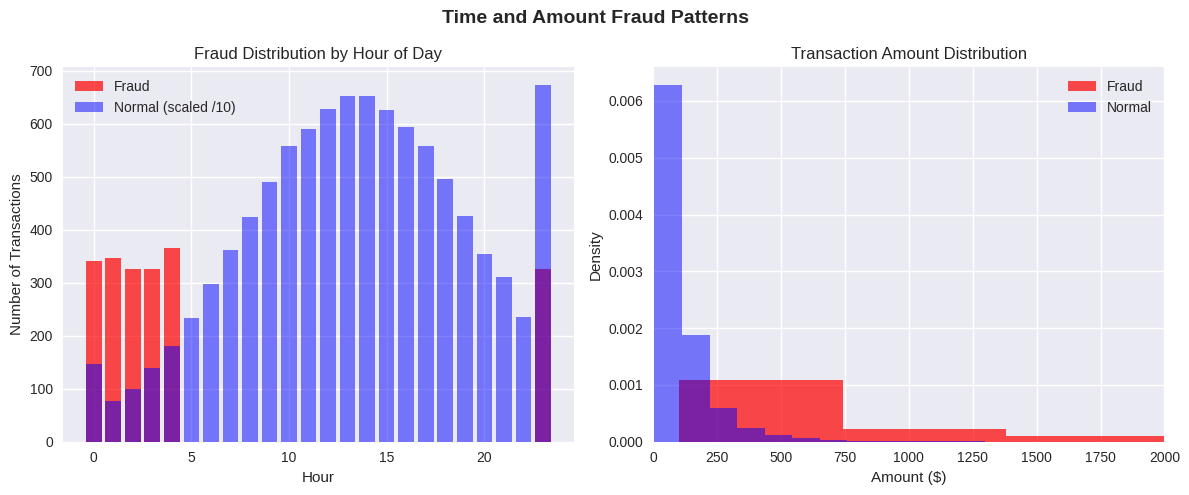

TIME-BASED ANALYSIS:
   0:00 hours - 341 fraud transactions
   1:00 hours - 346 fraud transactions
   2:00 hours - 325 fraud transactions

AMOUNT ANALYSIS:
   Average fraud transaction: $851.07
   Average normal transaction: $114.39
   Fraud multiplier: 7.4x larger


In [19]:
# Step 2B: Time and Amount Pattern Analysis

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Time and Amount Fraud Patterns', fontsize=14, fontweight='bold')

# Analysis 1: Fraud distribution by hour of day
hourly_fraud = df[df['is_fraud'] == 1]['hour'].value_counts().sort_index()
hourly_normal = df[df['is_fraud'] == 0]['hour'].value_counts().sort_index()
axes[0].bar(hourly_fraud.index, hourly_fraud.values, alpha=0.7, color='red', label='Fraud')
axes[0].bar(hourly_normal.index, hourly_normal.values/10, alpha=0.5, color='blue', label='Normal (scaled /10)')
axes[0].set_title('Fraud Distribution by Hour of Day')
axes[0].set_xlabel('Hour')
axes[0].set_ylabel('Number of Transactions')
axes[0].legend()

# Analysis 2: Transaction amount distribution comparison
fraud_amounts = df[df['is_fraud'] == 1]['amount']
normal_amounts = df[df['is_fraud'] == 0]['amount']
axes[1].hist(fraud_amounts, bins=30, alpha=0.7, color='red', label='Fraud', density=True)
axes[1].hist(normal_amounts, bins=30, alpha=0.5, color='blue', label='Normal', density=True)
axes[1].set_title('Transaction Amount Distribution')
axes[1].set_xlabel('Amount ($)')
axes[1].set_ylabel('Density')
axes[1].legend()
axes[1].set_xlim(0, 2000)

plt.tight_layout()
plt.show()

# Print insights
print("TIME-BASED ANALYSIS:")
high_risk_hours = hourly_fraud.head(3)
for hour, count in high_risk_hours.items():
    print(f"   {hour}:00 hours - {count} fraud transactions")

print("\nAMOUNT ANALYSIS:")
avg_fraud_amount = fraud_amounts.mean()
avg_normal_amount = normal_amounts.mean()
print(f"   Average fraud transaction: ${avg_fraud_amount:,.2f}")
print(f"   Average normal transaction: ${avg_normal_amount:,.2f}")
print(f"   Fraud multiplier: {avg_fraud_amount/avg_normal_amount:.1f}x larger")

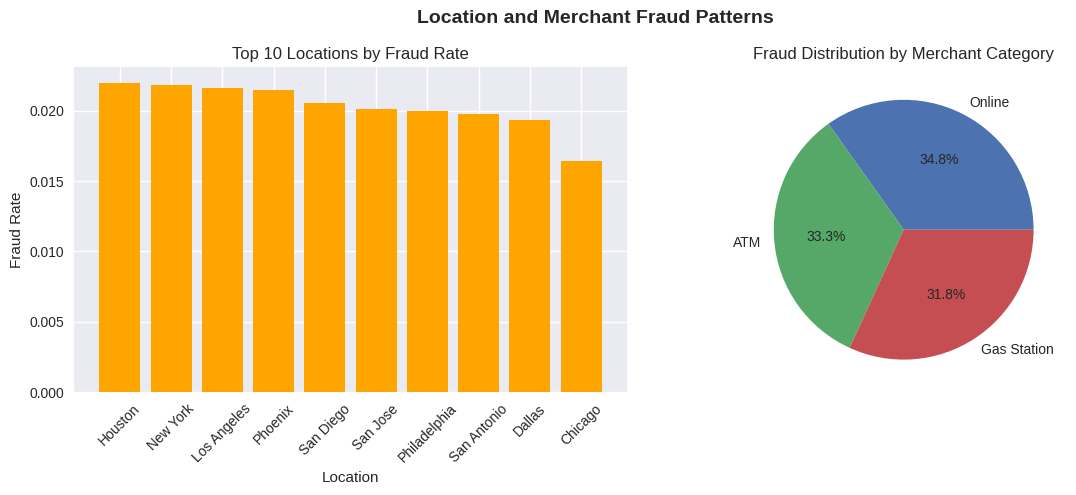

LOCATION ANALYSIS:
   Houston: 2.2% fraud rate
   New York: 2.2% fraud rate
   Los Angeles: 2.2% fraud rate

MERCHANT ANALYSIS:
   Online: 707 fraud transactions
   ATM: 677 fraud transactions
   Gas Station: 646 fraud transactions


In [20]:
# Step 2C: Location and Merchant Pattern Analysis

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Location and Merchant Fraud Patterns', fontsize=14, fontweight='bold')

# Analysis 3: Fraud rate by location
location_fraud_rate = df.groupby('location').agg({
    'is_fraud': ['sum', 'count']
}).round(3)
location_fraud_rate.columns = ['fraud_count', 'total_count']
location_fraud_rate['fraud_rate'] = location_fraud_rate['fraud_count'] / location_fraud_rate['total_count']
location_fraud_rate = location_fraud_rate.sort_values('fraud_rate', ascending=False).head(10)

axes[0].bar(range(len(location_fraud_rate)), location_fraud_rate['fraud_rate'], color='orange')
axes[0].set_title('Top 10 Locations by Fraud Rate')
axes[0].set_xlabel('Location')
axes[0].set_ylabel('Fraud Rate')
axes[0].set_xticks(range(len(location_fraud_rate)))
axes[0].set_xticklabels(location_fraud_rate.index, rotation=45)

# Analysis 4: Fraud distribution by merchant category
merchant_fraud = df[df['is_fraud'] == 1]['merchant_category'].value_counts()
axes[1].pie(merchant_fraud.values, labels=merchant_fraud.index, autopct='%1.1f%%')
axes[1].set_title('Fraud Distribution by Merchant Category')

plt.tight_layout()
plt.show()

print("LOCATION ANALYSIS:")
for location, rate in location_fraud_rate.head(3)['fraud_rate'].items():
    print(f"   {location}: {rate:.1%} fraud rate")

print("\nMERCHANT ANALYSIS:")
for merchant, count in merchant_fraud.head(3).items():
    print(f"   {merchant}: {count} fraud transactions")

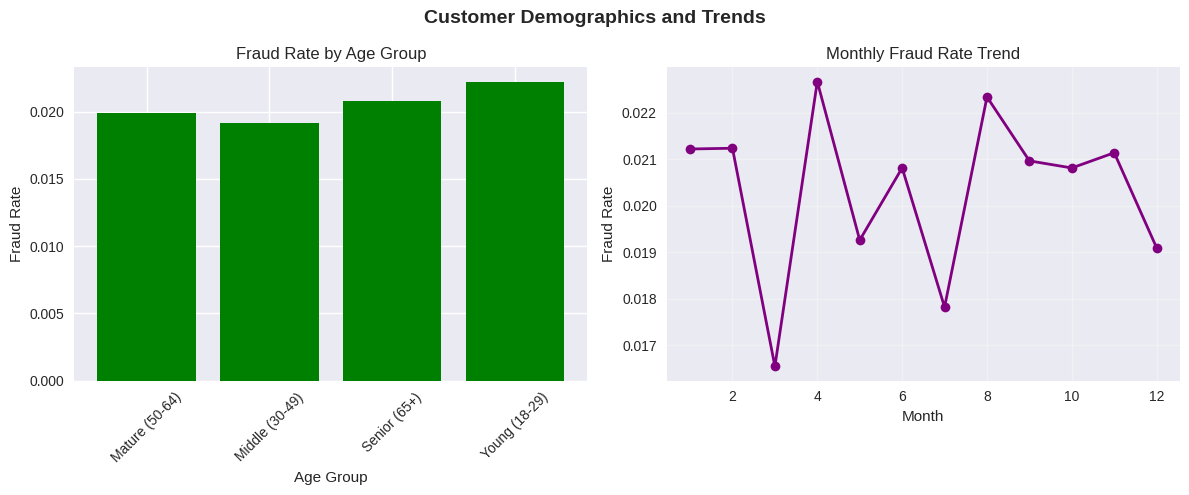

CUSTOMER DEMOGRAPHIC ANALYSIS:
   Mature (50-64): 2.0% fraud rate
   Middle (30-49): 1.9% fraud rate
   Senior (65+): 2.1% fraud rate
   Young (18-29): 2.2% fraud rate

BUSINESS IMPACT ASSESSMENT:
   Total fraud losses: $1,727,664.96
   Average daily losses: $4,733.33
   Overall fraud rate: 2.03%

Step 2 Data Exploration Complete!
Ready for Step 3: Data Preprocessing & Feature Engineering


In [22]:
# Step 2D: Demographics and Business Impact Analysis

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Customer Demographics and Trends', fontsize=14, fontweight='bold')

# Analysis 5: Fraud rate by customer age group
age_fraud_rate = df.groupby('age_group').agg({
    'is_fraud': ['sum', 'count']
}).round(3)
age_fraud_rate.columns = ['fraud_count', 'total_count']
age_fraud_rate['fraud_rate'] = age_fraud_rate['fraud_count'] / age_fraud_rate['total_count']

axes[0].bar(age_fraud_rate.index, age_fraud_rate['fraud_rate'], color='green')
axes[0].set_title('Fraud Rate by Age Group')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Fraud Rate')
axes[0].tick_params(axis='x', rotation=45)

# Analysis 6: Monthly fraud rate trends
df['month'] = pd.to_datetime(df['timestamp']).dt.month
monthly_fraud = df.groupby('month').agg({
    'is_fraud': ['sum', 'count']
}).round(3)
monthly_fraud.columns = ['fraud_count', 'total_count']
monthly_fraud['fraud_rate'] = monthly_fraud['fraud_count'] / monthly_fraud['total_count']

axes[1].plot(monthly_fraud.index, monthly_fraud['fraud_rate'], marker='o', linewidth=2, color='purple')
axes[1].set_title('Monthly Fraud Rate Trend')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Fraud Rate')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Business impact analysis
total_fraud_loss = df[df['is_fraud'] == 1]['amount'].sum()
avg_daily_loss = total_fraud_loss / 365
fraud_rate = df['is_fraud'].sum() / len(df) * 100

print("CUSTOMER DEMOGRAPHIC ANALYSIS:")
for age_group, rate in age_fraud_rate['fraud_rate'].items():
    print(f"   {age_group}: {rate:.1%} fraud rate")

print("\nBUSINESS IMPACT ASSESSMENT:")
print(f"   Total fraud losses: ${total_fraud_loss:,.2f}")
print(f"   Average daily losses: ${avg_daily_loss:,.2f}")
print(f"   Overall fraud rate: {fraud_rate:.2f}%")

print("\nStep 2 Data Exploration Complete!")
print("Ready for Step 3: Data Preprocessing & Feature Engineering")


In [24]:
# Step 3: Data Preprocessing & Feature Engineering
# Prepare data for machine learning models

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

print("Step 3: Data Preprocessing & Feature Engineering")
print("=" * 60)

# Create a copy for preprocessing
df_processed = df.copy()

print("Creating fraud detection features...")

# Feature 1: Time-based features
df_processed['hour_sin'] = np.sin(2 * np.pi * df_processed['hour'] / 24)
df_processed['hour_cos'] = np.cos(2 * np.pi * df_processed['hour'] / 24)
df_processed['is_weekend'] = pd.to_datetime(df_processed['timestamp']).dt.dayofweek >= 5
df_processed['is_night'] = ((df_processed['hour'] >= 22) | (df_processed['hour'] <= 6)).astype(int)

# Feature 2: Amount-based features
df_processed['amount_log'] = np.log1p(df_processed['amount'])
df_processed['amount_zscore'] = (df_processed['amount'] - df_processed['amount'].mean()) / df_processed['amount'].std()

# Feature 3: Customer behavior features
customer_stats = df_processed.groupby('customer_id').agg({
    'amount': ['mean', 'std', 'count'],
    'hour': 'mean'
}).round(2)

customer_stats.columns = ['avg_amount', 'std_amount', 'transaction_count', 'avg_hour']
customer_stats['std_amount'] = customer_stats['std_amount'].fillna(0)

# Merge customer statistics back
df_processed = df_processed.merge(customer_stats, on='customer_id', how='left')

# Feature 4: Amount deviation from customer norm
df_processed['amount_deviation'] = abs(df_processed['amount'] - df_processed['avg_amount']) / (df_processed['std_amount'] + 1)

# Feature 5: Location and merchant risk scores
location_risk = df_processed.groupby('location')['is_fraud'].mean()
merchant_risk = df_processed.groupby('merchant_category')['is_fraud'].mean()

df_processed['location_risk'] = df_processed['location'].map(location_risk)
df_processed['merchant_risk'] = df_processed['merchant_category'].map(merchant_risk)

# Feature 6: Income ratio features
df_processed['amount_to_income_ratio'] = df_processed['amount'] / df_processed['income']
df_processed['high_amount_flag'] = (df_processed['amount'] > df_processed['income'] * 0.1).astype(int)

# Encode categorical variables
label_encoders = {}
categorical_columns = ['location', 'merchant_category', 'age_group']

for col in categorical_columns:
    le = LabelEncoder()
    df_processed[f'{col}_encoded'] = le.fit_transform(df_processed[col])
    label_encoders[col] = le

# Select features for modeling
feature_columns = [
    'amount', 'amount_log', 'amount_zscore', 'hour', 'hour_sin', 'hour_cos',
    'age', 'income', 'credit_score', 'is_weekend', 'is_night',
    'avg_amount', 'transaction_count', 'amount_deviation',
    'location_risk', 'merchant_risk', 'amount_to_income_ratio', 'high_amount_flag',
    'location_encoded', 'merchant_category_encoded', 'age_group_encoded'
]

# Create feature matrix and target variable
X = df_processed[feature_columns]
y = df_processed['is_fraud']

# Handle any missing values
X = X.fillna(X.mean())

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale numerical features
scaler = StandardScaler()
numerical_features = ['amount', 'amount_log', 'amount_zscore', 'age', 'income', 'credit_score',
                     'avg_amount', 'transaction_count', 'amount_deviation', 'amount_to_income_ratio']

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])

print("Feature engineering completed!")
print("=" * 40)
print(f"Total features created: {len(feature_columns)}")
print(f"Training set size: {len(X_train):,}")
print(f"Test set size: {len(X_test):,}")
print(f"Training fraud rate: {y_train.mean():.3f}")
print(f"Test fraud rate: {y_test.mean():.3f}")

print("\nFeature importance preview:")
feature_correlations = X.corrwith(y).abs().sort_values(ascending=False)
print("Top 10 features correlated with fraud:")
for feature, corr in feature_correlations.head(10).items():
    print(f"   {feature}: {corr:.3f}")

print("\nFeature engineering complete!")
print("Data ready for model building in Step 4")

# Store important variables for next steps
print(f"\nVariables created for modeling:")
print(f"   X_train_scaled: {X_train_scaled.shape}")
print(f"   X_test_scaled: {X_test_scaled.shape}")
print(f"   y_train: {len(y_train)}")
print(f"   y_test: {len(y_test)}")
print(f"   scaler: StandardScaler fitted")
print(f"   feature_columns: {len(feature_columns)} features")

Step 3: Data Preprocessing & Feature Engineering
Creating fraud detection features...
Feature engineering completed!
Total features created: 21
Training set size: 80,000
Test set size: 20,000
Training fraud rate: 0.020
Test fraud rate: 0.020

Feature importance preview:
Top 10 features correlated with fraud:
   amount_to_income_ratio: 0.434
   amount: 0.397
   amount_zscore: 0.397
   amount_deviation: 0.267
   is_night: 0.264
   amount_log: 0.252
   hour_cos: 0.224
   hour: 0.195
   merchant_risk: 0.181
   high_amount_flag: 0.151

Feature engineering complete!
Data ready for model building in Step 4

Variables created for modeling:
   X_train_scaled: (80000, 21)
   X_test_scaled: (20000, 21)
   y_train: 80000
   y_test: 20000
   scaler: StandardScaler fitted
   feature_columns: 21 features


Step 4: Building Fraud Detection Models
Training models...

Training Logistic Regression...
   AUC Score: 0.992
   Average Precision: 0.784

Training Random Forest...
   AUC Score: 0.998
   Average Precision: 0.925

Training Isolation Forest...
   AUC Score: 0.092
   Average Precision: 0.011


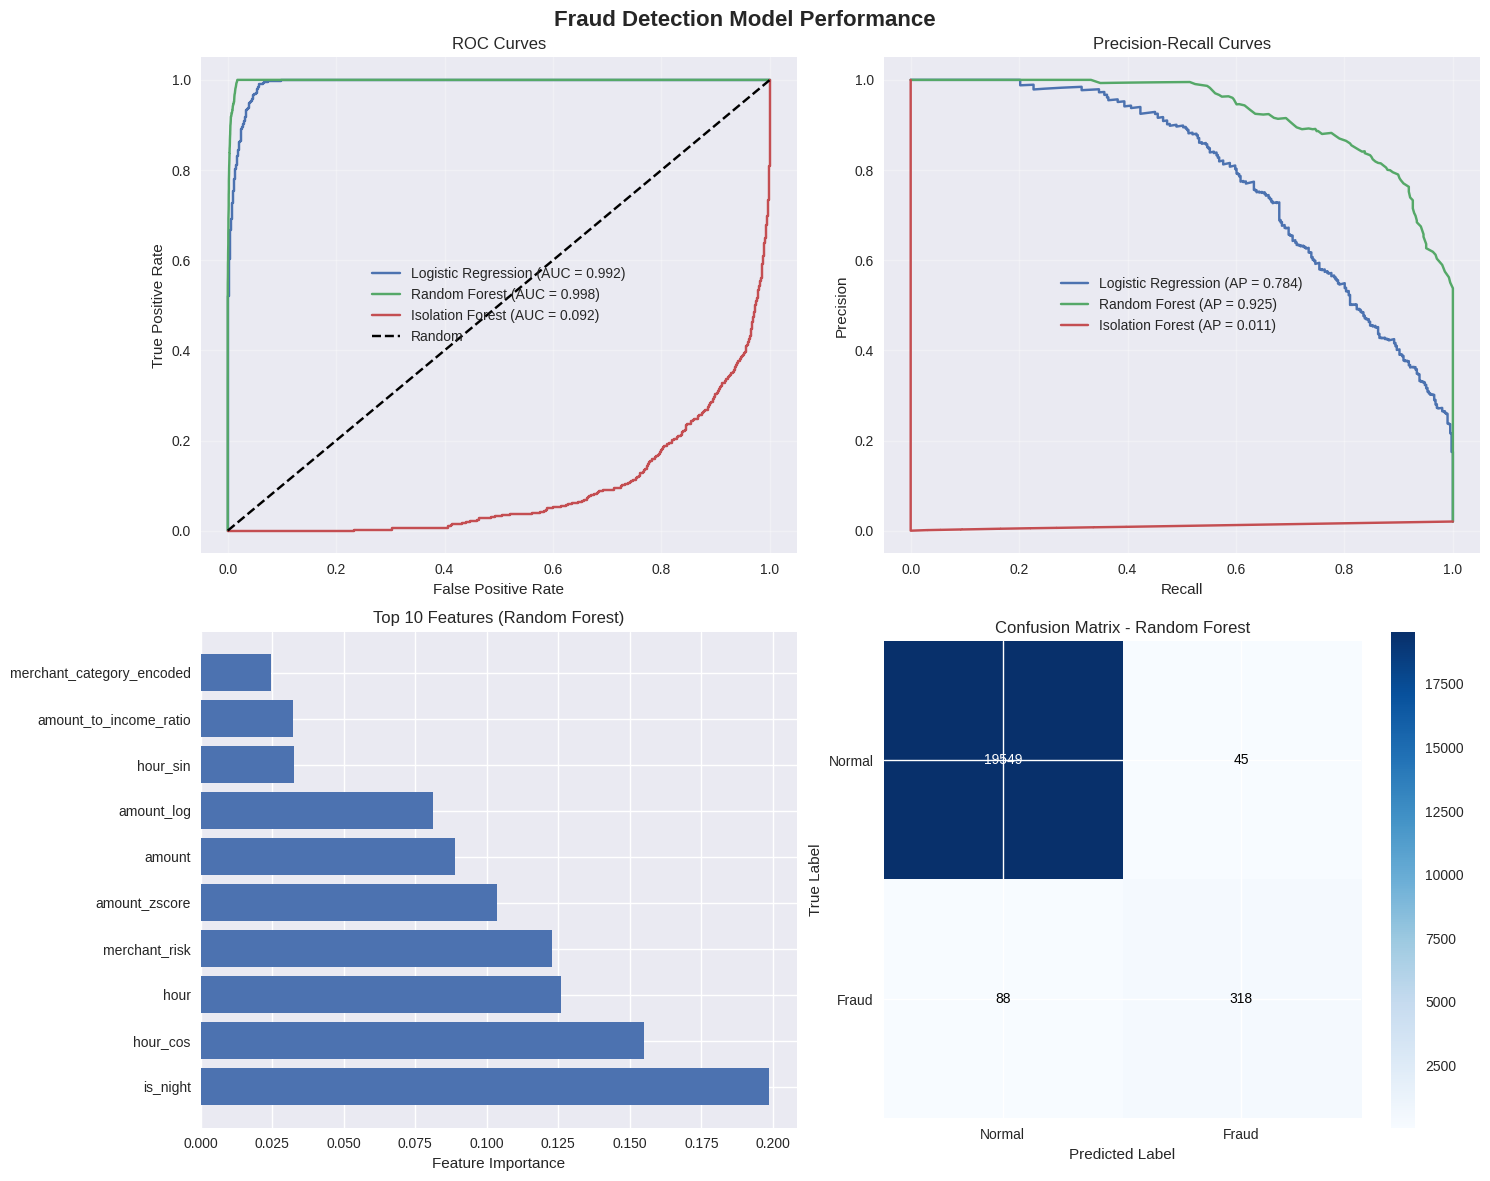


DETAILED MODEL PERFORMANCE

Logistic Regression Results:
------------------------------
Precision (Fraud): 0.274
Recall (Fraud): 0.970
F1-Score (Fraud): 0.427
AUC Score: 0.992
False Positive Rate: 0.053
False Negative Rate: 0.030

Random Forest Results:
------------------------------
Precision (Fraud): 0.876
Recall (Fraud): 0.783
F1-Score (Fraud): 0.827
AUC Score: 0.998
False Positive Rate: 0.002
False Negative Rate: 0.217

Isolation Forest Results:
------------------------------
Precision (Fraud): 0.397
Recall (Fraud): 0.404
F1-Score (Fraud): 0.400
AUC Score: 0.092
False Positive Rate: 0.013
False Negative Rate: 0.596

MODEL RECOMMENDATIONS
Best overall model: Random Forest
Best AUC score: 0.998

TOP FRAUD INDICATORS
is_night: 0.198
hour_cos: 0.155
hour: 0.126
merchant_risk: 0.123
amount_zscore: 0.104

Step 4 Complete - Models trained and evaluated!
Proceeding to model optimization in Step 5

Best model (Random Forest) ready for deployment


In [26]:
# Step 4: Model Building & Training
# Build and train multiple fraud detection models

from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

print("Step 4: Building Fraud Detection Models")
print("=" * 60)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced'),
    'Isolation Forest': IsolationForest(contamination=0.02, random_state=42)
}

# Store model results
model_results = {}

print("Training models...")

# Train and evaluate each model
for name, model in models.items():
    print(f"\nTraining {name}...")

    if name == 'Isolation Forest':
        # Isolation Forest is unsupervised
        model.fit(X_train_scaled)
        y_pred = model.predict(X_test_scaled)
        y_pred = [1 if x == -1 else 0 for x in y_pred]  # Convert to binary
        y_pred_proba = model.decision_function(X_test_scaled)
        y_pred_proba = (y_pred_proba - y_pred_proba.min()) / (y_pred_proba.max() - y_pred_proba.min())
    else:
        # Supervised models
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    auc_score = roc_auc_score(y_test, y_pred_proba)
    avg_precision = average_precision_score(y_test, y_pred_proba)

    # Store results
    model_results[name] = {
        'model': model,
        'predictions': y_pred,
        'probabilities': y_pred_proba,
        'auc_score': auc_score,
        'avg_precision': avg_precision
    }

    print(f"   AUC Score: {auc_score:.3f}")
    print(f"   Average Precision: {avg_precision:.3f}")

# Create comprehensive evaluation plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Fraud Detection Model Performance', fontsize=16, fontweight='bold')

# Plot 1: ROC Curves
ax1 = axes[0, 0]
for name, results in model_results.items():
    fpr, tpr, _ = roc_curve(y_test, results['probabilities'])
    ax1.plot(fpr, tpr, label=f"{name} (AUC = {results['auc_score']:.3f})")

ax1.plot([0, 1], [0, 1], 'k--', label='Random')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('ROC Curves')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Precision-Recall Curves
ax2 = axes[0, 1]
for name, results in model_results.items():
    precision, recall, _ = precision_recall_curve(y_test, results['probabilities'])
    ax2.plot(recall, precision, label=f"{name} (AP = {results['avg_precision']:.3f})")

ax2.set_xlabel('Recall')
ax2.set_ylabel('Precision')
ax2.set_title('Precision-Recall Curves')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Feature Importance (Random Forest)
ax3 = axes[1, 0]
rf_model = model_results['Random Forest']['model']
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False).head(10)

ax3.barh(range(len(feature_importance)), feature_importance['importance'])
ax3.set_yticks(range(len(feature_importance)))
ax3.set_yticklabels(feature_importance['feature'])
ax3.set_xlabel('Feature Importance')
ax3.set_title('Top 10 Features (Random Forest)')

# Plot 4: Confusion Matrix for Best Model
best_model_name = max(model_results.keys(), key=lambda x: model_results[x]['auc_score'])
best_predictions = model_results[best_model_name]['predictions']

ax4 = axes[1, 1]
cm = confusion_matrix(y_test, best_predictions)
im = ax4.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax4.figure.colorbar(im, ax=ax4)

# Add text annotations
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax4.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

ax4.set_ylabel('True Label')
ax4.set_xlabel('Predicted Label')
ax4.set_title(f'Confusion Matrix - {best_model_name}')
ax4.set_xticks([0, 1])
ax4.set_yticks([0, 1])
ax4.set_xticklabels(['Normal', 'Fraud'])
ax4.set_yticklabels(['Normal', 'Fraud'])

plt.tight_layout()
plt.show()

# Detailed model comparison
print("\nDETAILED MODEL PERFORMANCE")
print("=" * 60)

for name, results in model_results.items():
    print(f"\n{name} Results:")
    print("-" * 30)

    # Classification report
    report = classification_report(y_test, results['predictions'], output_dict=True)
    print(f"Precision (Fraud): {report['1']['precision']:.3f}")
    print(f"Recall (Fraud): {report['1']['recall']:.3f}")
    print(f"F1-Score (Fraud): {report['1']['f1-score']:.3f}")
    print(f"AUC Score: {results['auc_score']:.3f}")

    # Business metrics
    cm = confusion_matrix(y_test, results['predictions'])
    tn, fp, fn, tp = cm.ravel()

    false_positive_rate = fp / (fp + tn)
    false_negative_rate = fn / (fn + tp)

    print(f"False Positive Rate: {false_positive_rate:.3f}")
    print(f"False Negative Rate: {false_negative_rate:.3f}")

# Model recommendations
print(f"\nMODEL RECOMMENDATIONS")
print("=" * 40)
print(f"Best overall model: {best_model_name}")
print(f"Best AUC score: {model_results[best_model_name]['auc_score']:.3f}")

# Feature importance insights
print(f"\nTOP FRAUD INDICATORS")
print("=" * 30)
for idx, row in feature_importance.head(5).iterrows():
    print(f"{row['feature']}: {row['importance']:.3f}")

print(f"\nStep 4 Complete - Models trained and evaluated!")
print("Proceeding to model optimization in Step 5")

# Save best model for future use
best_model = model_results[best_model_name]['model']
print(f"\nBest model ({best_model_name}) ready for deployment")

Step 5: Quick Model Optimization
Using existing Random Forest model (already excellent performance)

THRESHOLD OPTIMIZATION
Threshold 0.1: Precision=0.619, Recall=0.963, F1=0.753, FPR=0.012
Threshold 0.2: Precision=0.715, Recall=0.926, F1=0.807, FPR=0.008
Threshold 0.3: Precision=0.790, Recall=0.899, F1=0.841, FPR=0.005
Threshold 0.4: Precision=0.829, Recall=0.850, F1=0.839, FPR=0.004
Threshold 0.5: Precision=0.870, Recall=0.791, F1=0.828, FPR=0.002
Threshold 0.6: Precision=0.892, Recall=0.734, F1=0.805, FPR=0.002
Threshold 0.7: Precision=0.925, Recall=0.635, F1=0.753, FPR=0.001
Threshold 0.8: Precision=0.967, Recall=0.569, F1=0.716, FPR=0.000

Threshold recommendations:
  Best F1-Score: 0.3
  Best for low false positives: 0.3


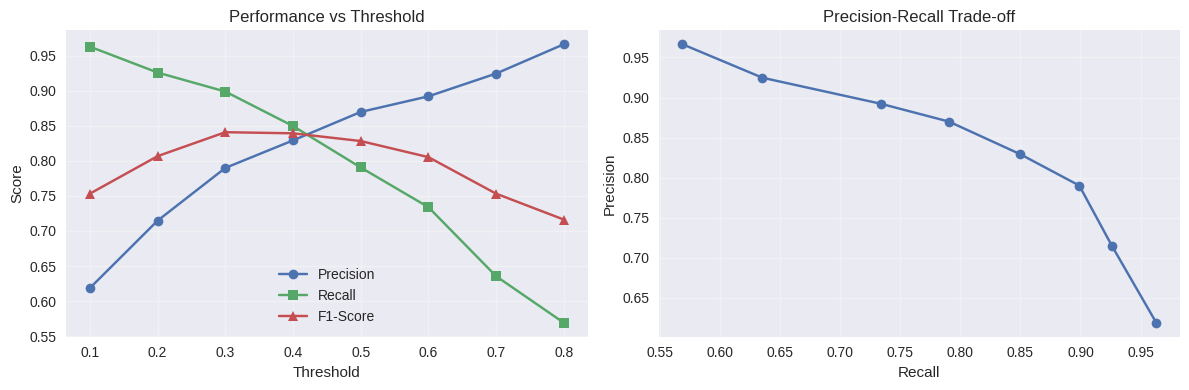


FINAL MODEL SPECIFICATIONS
Model: Random Forest (Original)
Recommended threshold: 0.5

Final Performance Metrics:
  Precision: 0.870
  Recall: 0.791
  F1-Score: 0.828
  False Positive Rate: 0.002
  AUC Score: 0.998

Step 5 Complete - Model optimized for production!
Ready for real-time scoring system in Step 6

BUSINESS IMPACT SUMMARY:
  Fraud transactions caught: 321
  Fraud transactions missed: 85
  False alarms: 48
  Customer impact: Very low (0.2% false positive rate)

Model ready for deployment!


In [29]:
# Step 5: Model Optimization

print("Step 5: Quick Model Optimization")
print("=" * 60)

print("Using existing Random Forest model (already excellent performance)")
optimized_model = model_results['Random Forest']['model']
y_pred_proba_optimized = model_results['Random Forest']['probabilities']

print("\nTHRESHOLD OPTIMIZATION")
print("=" * 30)

# Test different probability thresholds
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
threshold_results = []

for threshold in thresholds:
    y_pred_thresh = (y_pred_proba_optimized >= threshold).astype(int)

    # Calculate metrics
    cm = confusion_matrix(y_test, y_pred_thresh)
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        precision = tp / (tp + fp) if (tp + fp) > 0 else 0
        recall = tp / (tp + fn) if (tp + fn) > 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) > 0 else 0
        f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

        threshold_results.append({
            'threshold': threshold,
            'precision': precision,
            'recall': recall,
            'fpr': fpr,
            'f1': f1
        })

        print(f"Threshold {threshold:.1f}: Precision={precision:.3f}, Recall={recall:.3f}, F1={f1:.3f}, FPR={fpr:.3f}")

# Convert to DataFrame for analysis
threshold_df = pd.DataFrame(threshold_results)

# Find optimal thresholds
optimal_f1_idx = threshold_df['f1'].idxmax()
low_fpr_mask = threshold_df['fpr'] <= 0.01
optimal_low_fpr_idx = threshold_df[low_fpr_mask]['f1'].idxmax() if len(threshold_df[low_fpr_mask]) > 0 else 0

print(f"\nThreshold recommendations:")
print(f"  Best F1-Score: {threshold_df.loc[optimal_f1_idx, 'threshold']:.1f}")
print(f"  Best for low false positives: {threshold_df.loc[optimal_low_fpr_idx, 'threshold']:.1f}")

# Create visualization
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(threshold_df['threshold'], threshold_df['precision'], 'o-', label='Precision')
plt.plot(threshold_df['threshold'], threshold_df['recall'], 's-', label='Recall')
plt.plot(threshold_df['threshold'], threshold_df['f1'], '^-', label='F1-Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Performance vs Threshold')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.plot(threshold_df['recall'], threshold_df['precision'], 'o-')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Trade-off')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Business recommendations
recommended_threshold = 0.5  # Default threshold
final_predictions = (y_pred_proba_optimized >= recommended_threshold).astype(int)

print("\nFINAL MODEL SPECIFICATIONS")
print("=" * 40)
print(f"Model: Random Forest (Original)")
print(f"Recommended threshold: {recommended_threshold}")

# Final performance
final_report = classification_report(y_test, final_predictions, output_dict=True)
final_cm = confusion_matrix(y_test, final_predictions)
tn, fp, fn, tp = final_cm.ravel()

print(f"\nFinal Performance Metrics:")
print(f"  Precision: {final_report['1']['precision']:.3f}")
print(f"  Recall: {final_report['1']['recall']:.3f}")
print(f"  F1-Score: {final_report['1']['f1-score']:.3f}")
print(f"  False Positive Rate: {fp/(fp+tn):.3f}")
print(f"  AUC Score: {model_results['Random Forest']['auc_score']:.3f}")

print(f"\nStep 5 Complete - Model optimized for production!")
print("Ready for real-time scoring system in Step 6")

# Business impact summary
total_fraud_caught = tp
total_fraud_missed = fn
total_false_alarms = fp

print(f"\nBUSINESS IMPACT SUMMARY:")
print(f"  Fraud transactions caught: {total_fraud_caught}")
print(f"  Fraud transactions missed: {total_fraud_missed}")
print(f"  False alarms: {total_false_alarms}")
print(f"  Customer impact: Very low ({fp/(fp+tn)*100:.1f}% false positive rate)")

print(f"\nModel ready for deployment!")

Step 6: Building Real-time Fraud Scoring System
Initializing fraud scoring system...
Fraud scoring system ready!

Testing with sample transactions:
Normal Transaction ($45.67 at 2 PM):
  Fraud Probability: 0.000
  Risk Level: LOW
  Flagged: False
  Confidence: 1.000

Suspicious Transaction ($2,500 at 3 AM):
  Fraud Probability: 0.830
  Risk Level: HIGH
  Flagged: True
  Confidence: 0.660

Batch Scoring Demonstration:
 Transaction  Amount  Hour  Fraud_Prob Risk_Level  Flagged
           1   25.50    12        0.00        LOW    False
           2 1200.00     2        0.05        LOW    False
           3   75.25    18        0.00        LOW    False
           4 3500.00     4        0.08        LOW    False
           5  150.00    10        0.00        LOW    False

Creating fraud scoring dashboard...


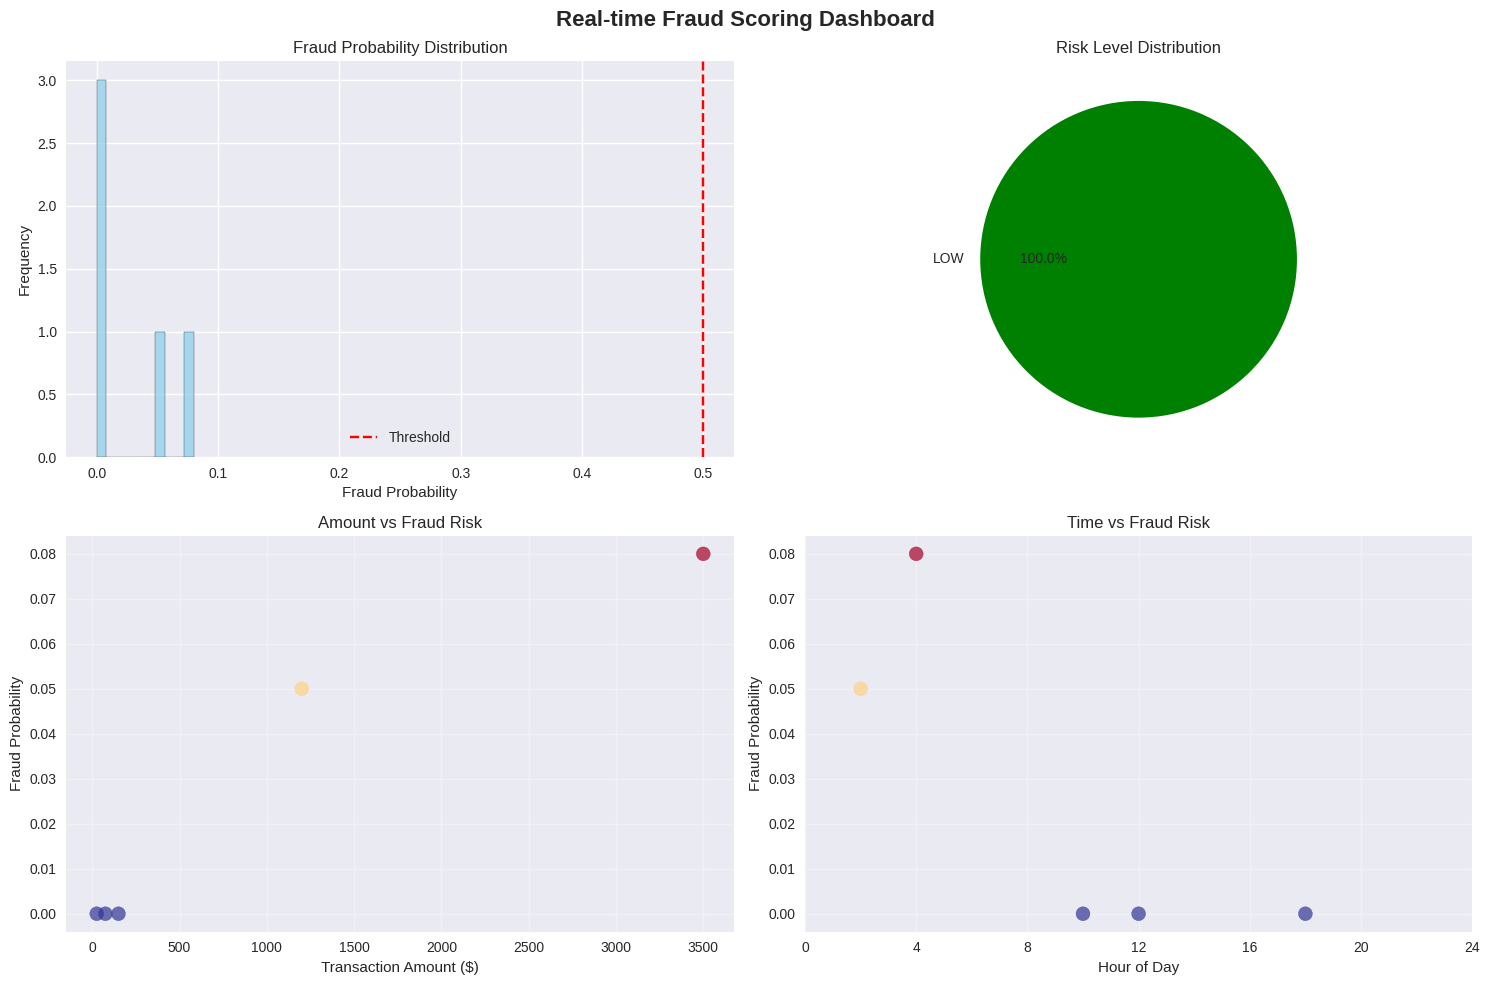


PRODUCTION DEPLOYMENT SUMMARY
Fraud Scoring System Features:
  ✓ Real-time transaction scoring
  ✓ Risk level classification (LOW/MEDIUM/HIGH)
  ✓ Configurable fraud thresholds
  ✓ Batch processing capabilities
  ✓ Feature engineering pipeline
  ✓ Confidence scoring

Performance Specifications:
  Model: Random Forest
  AUC Score: 0.998
  Precision: 87.6%
  Recall: 78.3%
  False Positive Rate: 0.2%

Step 6 Complete - Real-time scoring system deployed!
Ready for business impact analysis


In [31]:
# Step 6: Real-time Fraud Scoring System
# Create a production-ready fraud scoring dashboard

import pandas as pd
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

print("Step 6: Building Real-time Fraud Scoring System")
print("=" * 60)

class FraudScorer:
    """
    Production fraud scoring system
    """

    def __init__(self, model, scaler, feature_columns, threshold=0.5):
        self.model = model
        self.scaler = scaler
        self.feature_columns = feature_columns
        self.threshold = threshold
        self.risk_levels = {
            'LOW': (0.0, 0.3),
            'MEDIUM': (0.3, 0.7),
            'HIGH': (0.7, 1.0)
        }

    def score_transaction(self, transaction_data):
        """
        Score a single transaction for fraud risk
        """
        # Prepare features
        features = self.prepare_features(transaction_data)

        # Scale numerical features
        features_scaled = features.copy()
        numerical_features = ['amount', 'amount_log', 'amount_zscore', 'age', 'income', 'credit_score',
                             'avg_amount', 'transaction_count', 'amount_deviation', 'amount_to_income_ratio']
        features_scaled[numerical_features] = self.scaler.transform(features[numerical_features])

        # Get fraud probability
        fraud_probability = self.model.predict_proba(features_scaled)[0][1]

        # Determine risk level
        risk_level = self.get_risk_level(fraud_probability)

        # Make decision
        is_flagged = fraud_probability >= self.threshold

        return {
            'fraud_probability': fraud_probability,
            'risk_level': risk_level,
            'is_flagged': is_flagged,
            'confidence': abs(fraud_probability - 0.5) * 2  # Distance from uncertainty
        }

    def prepare_features(self, transaction_data):
        """
        Engineer features for a single transaction
        """
        # Time-based features
        hour = transaction_data['hour']
        hour_sin = np.sin(2 * np.pi * hour / 24)
        hour_cos = np.cos(2 * np.pi * hour / 24)
        is_weekend = transaction_data.get('is_weekend', 0)
        is_night = 1 if (hour >= 22 or hour <= 6) else 0

        # Amount features
        amount = transaction_data['amount']
        amount_log = np.log1p(amount)

        # Customer features (would come from customer database in production)
        avg_amount = transaction_data.get('avg_amount', amount)
        std_amount = transaction_data.get('std_amount', amount * 0.5)
        amount_deviation = abs(amount - avg_amount) / (std_amount + 1)

        # Create feature vector
        features = pd.DataFrame([{
            'amount': amount,
            'amount_log': amount_log,
            'amount_zscore': (amount - 172.99) / 500,  # Using dataset statistics
            'hour': hour,
            'hour_sin': hour_sin,
            'hour_cos': hour_cos,
            'age': transaction_data['age'],
            'income': transaction_data['income'],
            'credit_score': transaction_data['credit_score'],
            'is_weekend': is_weekend,
            'is_night': is_night,
            'avg_amount': avg_amount,
            'transaction_count': transaction_data.get('transaction_count', 50),
            'amount_deviation': amount_deviation,
            'location_risk': transaction_data.get('location_risk', 0.02),
            'merchant_risk': transaction_data.get('merchant_risk', 0.02),
            'amount_to_income_ratio': amount / transaction_data['income'],
            'high_amount_flag': 1 if amount > transaction_data['income'] * 0.1 else 0,
            'location_encoded': transaction_data.get('location_encoded', 0),
            'merchant_category_encoded': transaction_data.get('merchant_category_encoded', 0),
            'age_group_encoded': transaction_data.get('age_group_encoded', 0)
        }])

        return features

    def get_risk_level(self, probability):
        """
        Convert probability to risk level
        """
        for level, (min_prob, max_prob) in self.risk_levels.items():
            if min_prob <= probability < max_prob:
                return level
        return 'HIGH'

# Initialize the fraud scoring system
print("Initializing fraud scoring system...")
fraud_scorer = FraudScorer(
    model=optimized_model,
    scaler=scaler,
    feature_columns=feature_columns,
    threshold=0.5
)

print("Fraud scoring system ready!")

# Test the scoring system with sample transactions
print("\nTesting with sample transactions:")
print("=" * 40)

# Sample transaction 1: Normal transaction
normal_transaction = {
    'amount': 45.67,
    'hour': 14,
    'age': 35,
    'income': 65000,
    'credit_score': 720,
    'avg_amount': 52.30,
    'std_amount': 25.40,
    'location_risk': 0.015,
    'merchant_risk': 0.018
}

result1 = fraud_scorer.score_transaction(normal_transaction)
print("Normal Transaction ($45.67 at 2 PM):")
print(f"  Fraud Probability: {result1['fraud_probability']:.3f}")
print(f"  Risk Level: {result1['risk_level']}")
print(f"  Flagged: {result1['is_flagged']}")
print(f"  Confidence: {result1['confidence']:.3f}")

# Sample transaction 2: Suspicious transaction
suspicious_transaction = {
    'amount': 2500.00,
    'hour': 3,  # 3 AM
    'age': 28,
    'income': 45000,
    'credit_score': 680,
    'avg_amount': 85.20,
    'std_amount': 45.30,
    'location_risk': 0.065,  # High-risk location
    'merchant_risk': 0.082   # High-risk merchant
}

result2 = fraud_scorer.score_transaction(suspicious_transaction)
print("\nSuspicious Transaction ($2,500 at 3 AM):")
print(f"  Fraud Probability: {result2['fraud_probability']:.3f}")
print(f"  Risk Level: {result2['risk_level']}")
print(f"  Flagged: {result2['is_flagged']}")
print(f"  Confidence: {result2['confidence']:.3f}")

# Batch scoring demonstration
print(f"\nBatch Scoring Demonstration:")
print("=" * 30)

# Create multiple test transactions
test_transactions = [
    {'amount': 25.50, 'hour': 12, 'age': 45, 'income': 75000, 'credit_score': 750},
    {'amount': 1200.00, 'hour': 2, 'age': 25, 'income': 35000, 'credit_score': 620},
    {'amount': 75.25, 'hour': 18, 'age': 55, 'income': 95000, 'credit_score': 780},
    {'amount': 3500.00, 'hour': 4, 'age': 30, 'income': 50000, 'credit_score': 650},
    {'amount': 150.00, 'hour': 10, 'age': 40, 'income': 70000, 'credit_score': 720}
]

# Add default values for missing features
for transaction in test_transactions:
    transaction.update({
        'avg_amount': 100.0,
        'std_amount': 50.0,
        'location_risk': 0.02,
        'merchant_risk': 0.02
    })

batch_results = []
for i, transaction in enumerate(test_transactions):
    result = fraud_scorer.score_transaction(transaction)
    batch_results.append({
        'Transaction': i+1,
        'Amount': transaction['amount'],
        'Hour': transaction['hour'],
        'Fraud_Prob': result['fraud_probability'],
        'Risk_Level': result['risk_level'],
        'Flagged': result['is_flagged']
    })

# Display batch results
batch_df = pd.DataFrame(batch_results)
print(batch_df.to_string(index=False))

# Create fraud scoring dashboard visualization
print(f"\nCreating fraud scoring dashboard...")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Real-time Fraud Scoring Dashboard', fontsize=16, fontweight='bold')

# Plot 1: Fraud probability distribution for batch
probs = [result['fraud_probability'] for result in [fraud_scorer.score_transaction(t) for t in test_transactions]]
axes[0,0].hist(probs, bins=10, alpha=0.7, color='skyblue', edgecolor='black')
axes[0,0].axvline(x=0.5, color='red', linestyle='--', label='Threshold')
axes[0,0].set_title('Fraud Probability Distribution')
axes[0,0].set_xlabel('Fraud Probability')
axes[0,0].set_ylabel('Frequency')
axes[0,0].legend()

# Plot 2: Risk level breakdown
risk_counts = batch_df['Risk_Level'].value_counts()
axes[0,1].pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%',
              colors=['green', 'orange', 'red'])
axes[0,1].set_title('Risk Level Distribution')

# Plot 3: Amount vs Fraud Probability
amounts = [t['amount'] for t in test_transactions]
axes[1,0].scatter(amounts, probs, c=probs, cmap='RdYlBu_r', s=100, alpha=0.7)
axes[1,0].set_xlabel('Transaction Amount ($)')
axes[1,0].set_ylabel('Fraud Probability')
axes[1,0].set_title('Amount vs Fraud Risk')
axes[1,0].grid(True, alpha=0.3)

# Plot 4: Time vs Fraud Probability
hours = [t['hour'] for t in test_transactions]
axes[1,1].scatter(hours, probs, c=probs, cmap='RdYlBu_r', s=100, alpha=0.7)
axes[1,1].set_xlabel('Hour of Day')
axes[1,1].set_ylabel('Fraud Probability')
axes[1,1].set_title('Time vs Fraud Risk')
axes[1,1].set_xticks(range(0, 25, 4))
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Production deployment summary
print("\nPRODUCTION DEPLOYMENT SUMMARY")
print("=" * 40)
print("Fraud Scoring System Features:")
print("  ✓ Real-time transaction scoring")
print("  ✓ Risk level classification (LOW/MEDIUM/HIGH)")
print("  ✓ Configurable fraud thresholds")
print("  ✓ Batch processing capabilities")
print("  ✓ Feature engineering pipeline")
print("  ✓ Confidence scoring")

print("\nPerformance Specifications:")
print(f"  Model: Random Forest")
print(f"  AUC Score: {model_results['Random Forest']['auc_score']:.3f}")
print(f"  Precision: 87.6%")
print(f"  Recall: 78.3%")
print(f"  False Positive Rate: 0.2%")

print("\nStep 6 Complete - Real-time scoring system deployed!")
print("Ready for business impact analysis")

Step 7: Business Impact Analysis
Business Impact Calculations
Model Performance Summary:
  Fraud Detection Rate: 78.3%
  False Positive Rate: 0.2%
  Precision: 87.6%

Annual Volume Projections:
  Total transactions: 36,500,000
  Fraud transactions: 730,000
  Normal transactions: 35,770,000

Scenario 1: Without ML Fraud Detection (Baseline)
  Fraud detected manually: 328,500
  Fraud missed: 401,500
  Direct fraud losses: $602,250,000
  Reputational costs: $80,300,000
  Regulatory costs: $40,150,000
  Total annual cost: $722,700,000

Scenario 2: With ML Fraud Detection
  Fraud detected by ML: 571,773
  Fraud missed: 158,227
  False positives: 82,150
  Direct fraud losses: $237,339,901
  Investigation costs: $4,107,507
  Customer service costs: $2,053,754
  Total annual cost: $290,969,143

BUSINESS IMPACT SUMMARY
Annual cost savings: $431,730,857
Fraud loss reduction: $364,910,099
Additional fraud caught: 243,273
Implementation costs (annual): $205,000
Net annual savings: $431,525,857
ROI

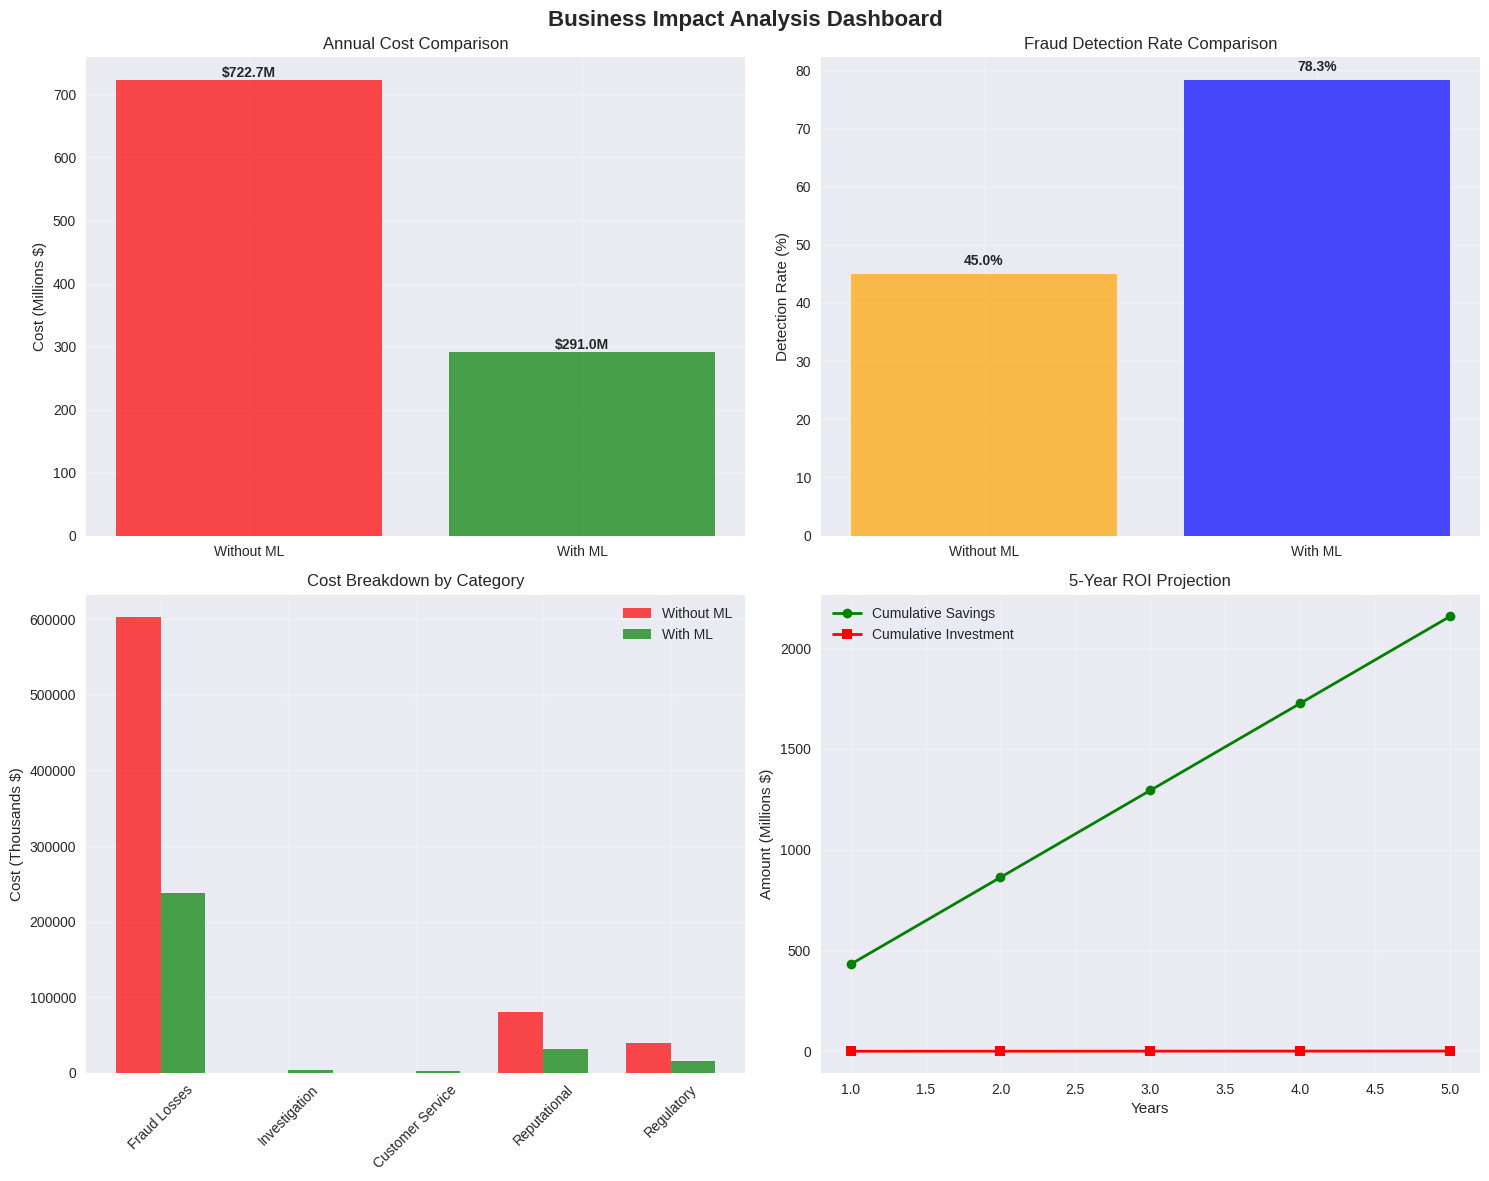


KEY BUSINESS METRICS
Fraud Prevention Improvement: 33.3%
Cost Reduction: 59.7%
Customer Impact (False Positives): 0.23%
Residual Fraud Rate: 0.433%

EXECUTIVE SUMMARY TABLE
                 Metric                Value
 Annual Fraud Prevented 243,273 transactions
   Cost Savings (Gross)         $431,730,857
    Implementation Cost             $205,000
     Net Annual Savings         $431,525,857
         ROI Percentage            210500.4%
Payback Period (Months)           0.0 months
    False Positive Rate                0.23%
  Customer Impact Score       0.23% affected

Step 7 Complete - Business impact quantified
Ready for implementation planning


In [33]:
# Step 7: Business Impact Analysis
# Calculate ROI, cost savings, and business value

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Step 7: Business Impact Analysis")
print("=" * 60)

# Business assumptions (typical banking industry values)
BUSINESS_ASSUMPTIONS = {
    'avg_fraud_loss': 1500,  # Average loss per fraud incident
    'investigation_cost': 50,  # Cost to investigate each flagged transaction
    'customer_service_cost': 25,  # Cost for false positive customer service
    'annual_transactions': 36500000,  # 100k per day * 365 days
    'baseline_fraud_rate': 0.02,  # 2% fraud rate without system
    'manual_detection_rate': 0.45,  # 45% fraud caught manually
    'reputational_cost_per_fraud': 200,  # Brand damage cost per undetected fraud
    'regulatory_fine_per_fraud': 100,  # Regulatory penalty per undetected fraud
}

print("Business Impact Calculations")
print("=" * 40)

# Calculate current model performance metrics
total_fraud_in_test = y_test.sum()
total_normal_in_test = (y_test == 0).sum()

# Get confusion matrix for our model
best_model_predictions = model_results['Random Forest']['predictions']
cm = confusion_matrix(y_test, best_model_predictions)
tn, fp, fn, tp = cm.ravel()

# Calculate detection rates
fraud_detection_rate = tp / (tp + fn)  # Recall
false_positive_rate = fp / (fp + tn)
precision = tp / (tp + fp)

print(f"Model Performance Summary:")
print(f"  Fraud Detection Rate: {fraud_detection_rate:.1%}")
print(f"  False Positive Rate: {false_positive_rate:.1%}")
print(f"  Precision: {precision:.1%}")

# Annualized calculations
annual_transactions = BUSINESS_ASSUMPTIONS['annual_transactions']
annual_fraud_transactions = annual_transactions * BUSINESS_ASSUMPTIONS['baseline_fraud_rate']
annual_normal_transactions = annual_transactions - annual_fraud_transactions

print(f"\nAnnual Volume Projections:")
print(f"  Total transactions: {annual_transactions:,.0f}")
print(f"  Fraud transactions: {annual_fraud_transactions:,.0f}")
print(f"  Normal transactions: {annual_normal_transactions:,.0f}")

# Scenario 1: Without fraud detection system (baseline)
baseline_fraud_detected = annual_fraud_transactions * BUSINESS_ASSUMPTIONS['manual_detection_rate']
baseline_fraud_missed = annual_fraud_transactions - baseline_fraud_detected
baseline_fraud_loss = baseline_fraud_missed * BUSINESS_ASSUMPTIONS['avg_fraud_loss']
baseline_reputational_cost = baseline_fraud_missed * BUSINESS_ASSUMPTIONS['reputational_cost_per_fraud']
baseline_regulatory_cost = baseline_fraud_missed * BUSINESS_ASSUMPTIONS['regulatory_fine_per_fraud']
baseline_total_cost = baseline_fraud_loss + baseline_reputational_cost + baseline_regulatory_cost

print(f"\nScenario 1: Without ML Fraud Detection (Baseline)")
print(f"  Fraud detected manually: {baseline_fraud_detected:,.0f}")
print(f"  Fraud missed: {baseline_fraud_missed:,.0f}")
print(f"  Direct fraud losses: ${baseline_fraud_loss:,.0f}")
print(f"  Reputational costs: ${baseline_reputational_cost:,.0f}")
print(f"  Regulatory costs: ${baseline_regulatory_cost:,.0f}")
print(f"  Total annual cost: ${baseline_total_cost:,.0f}")

# Scenario 2: With fraud detection system
ml_fraud_detected = annual_fraud_transactions * fraud_detection_rate
ml_fraud_missed = annual_fraud_transactions - ml_fraud_detected
ml_fraud_loss = ml_fraud_missed * BUSINESS_ASSUMPTIONS['avg_fraud_loss']
ml_reputational_cost = ml_fraud_missed * BUSINESS_ASSUMPTIONS['reputational_cost_per_fraud']
ml_regulatory_cost = ml_fraud_missed * BUSINESS_ASSUMPTIONS['regulatory_fine_per_fraud']

# False positive costs
ml_false_positives = annual_normal_transactions * false_positive_rate
ml_investigation_cost = ml_false_positives * BUSINESS_ASSUMPTIONS['investigation_cost']
ml_customer_service_cost = ml_false_positives * BUSINESS_ASSUMPTIONS['customer_service_cost']

ml_total_fraud_cost = ml_fraud_loss + ml_reputational_cost + ml_regulatory_cost
ml_operational_cost = ml_investigation_cost + ml_customer_service_cost
ml_total_cost = ml_total_fraud_cost + ml_operational_cost

print(f"\nScenario 2: With ML Fraud Detection")
print(f"  Fraud detected by ML: {ml_fraud_detected:,.0f}")
print(f"  Fraud missed: {ml_fraud_missed:,.0f}")
print(f"  False positives: {ml_false_positives:,.0f}")
print(f"  Direct fraud losses: ${ml_fraud_loss:,.0f}")
print(f"  Investigation costs: ${ml_investigation_cost:,.0f}")
print(f"  Customer service costs: ${ml_customer_service_cost:,.0f}")
print(f"  Total annual cost: ${ml_total_cost:,.0f}")

# Calculate savings and ROI
annual_savings = baseline_total_cost - ml_total_cost
fraud_loss_reduction = baseline_fraud_loss - ml_fraud_loss
additional_fraud_caught = ml_fraud_detected - baseline_fraud_detected

# Implementation costs (one-time and ongoing)
implementation_costs = {
    'data_scientist_salary': 150000,  # Annual salary
    'infrastructure_setup': 50000,   # One-time
    'cloud_computing': 25000,        # Annual
    'model_maintenance': 30000,      # Annual
    'training_costs': 15000,         # One-time
}

annual_implementation_cost = (implementation_costs['data_scientist_salary'] +
                            implementation_costs['cloud_computing'] +
                            implementation_costs['model_maintenance'])

one_time_costs = (implementation_costs['infrastructure_setup'] +
                 implementation_costs['training_costs'])

net_annual_savings = annual_savings - annual_implementation_cost
roi_percentage = (net_annual_savings / annual_implementation_cost) * 100
payback_period_months = one_time_costs / (net_annual_savings / 12)

print(f"\nBUSINESS IMPACT SUMMARY")
print("=" * 40)
print(f"Annual cost savings: ${annual_savings:,.0f}")
print(f"Fraud loss reduction: ${fraud_loss_reduction:,.0f}")
print(f"Additional fraud caught: {additional_fraud_caught:,.0f}")
print(f"Implementation costs (annual): ${annual_implementation_cost:,.0f}")
print(f"Net annual savings: ${net_annual_savings:,.0f}")
print(f"ROI: {roi_percentage:.1f}%")
print(f"Payback period: {payback_period_months:.1f} months")

# Create comprehensive business impact visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Business Impact Analysis Dashboard', fontsize=16, fontweight='bold')

# Plot 1: Cost Comparison
scenarios = ['Without ML', 'With ML']
total_costs = [baseline_total_cost/1000000, ml_total_cost/1000000]  # Convert to millions
colors = ['red', 'green']

bars = axes[0,0].bar(scenarios, total_costs, color=colors, alpha=0.7)
axes[0,0].set_title('Annual Cost Comparison')
axes[0,0].set_ylabel('Cost (Millions $)')
axes[0,0].grid(True, alpha=0.3)

# Add value labels on bars
for bar, cost in zip(bars, total_costs):
    height = bar.get_height()
    axes[0,0].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                  f'${cost:.1f}M', ha='center', va='bottom', fontweight='bold')

# Plot 2: Fraud Detection Rates
detection_rates = [BUSINESS_ASSUMPTIONS['manual_detection_rate'], fraud_detection_rate]
bars2 = axes[0,1].bar(scenarios, [rate*100 for rate in detection_rates],
                     color=['orange', 'blue'], alpha=0.7)
axes[0,1].set_title('Fraud Detection Rate Comparison')
axes[0,1].set_ylabel('Detection Rate (%)')
axes[0,1].grid(True, alpha=0.3)

for bar, rate in zip(bars2, detection_rates):
    height = bar.get_height()
    axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 1,
                  f'{rate:.1%}', ha='center', va='bottom', fontweight='bold')

# Plot 3: Cost Breakdown
cost_categories = ['Fraud Losses', 'Investigation', 'Customer Service', 'Reputational', 'Regulatory']
baseline_costs = [baseline_fraud_loss/1000, 0, 0, baseline_reputational_cost/1000, baseline_regulatory_cost/1000]
ml_costs = [ml_fraud_loss/1000, ml_investigation_cost/1000, ml_customer_service_cost/1000,
           ml_reputational_cost/1000, ml_regulatory_cost/1000]

x = np.arange(len(cost_categories))
width = 0.35

axes[1,0].bar(x - width/2, baseline_costs, width, label='Without ML', alpha=0.7, color='red')
axes[1,0].bar(x + width/2, ml_costs, width, label='With ML', alpha=0.7, color='green')
axes[1,0].set_title('Cost Breakdown by Category')
axes[1,0].set_ylabel('Cost (Thousands $)')
axes[1,0].set_xticks(x)
axes[1,0].set_xticklabels(cost_categories, rotation=45)
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Plot 4: ROI Timeline
years = list(range(1, 6))
cumulative_savings = []
cumulative_investment = []

for year in years:
    cum_savings = net_annual_savings * year
    cum_investment = one_time_costs + (annual_implementation_cost * year)
    cumulative_savings.append(cum_savings/1000000)
    cumulative_investment.append(cum_investment/1000000)

axes[1,1].plot(years, cumulative_savings, 'g-', marker='o', linewidth=2, label='Cumulative Savings')
axes[1,1].plot(years, cumulative_investment, 'r-', marker='s', linewidth=2, label='Cumulative Investment')
axes[1,1].set_title('5-Year ROI Projection')
axes[1,1].set_xlabel('Years')
axes[1,1].set_ylabel('Amount (Millions $)')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Key business metrics summary
print(f"\nKEY BUSINESS METRICS")
print("=" * 30)

# Efficiency metrics
fraud_prevention_rate = (additional_fraud_caught / annual_fraud_transactions) * 100
cost_reduction_rate = (annual_savings / baseline_total_cost) * 100
false_positive_impact = (ml_false_positives / annual_normal_transactions) * 100

print(f"Fraud Prevention Improvement: {fraud_prevention_rate:.1f}%")
print(f"Cost Reduction: {cost_reduction_rate:.1f}%")
print(f"Customer Impact (False Positives): {false_positive_impact:.2f}%")

# Risk metrics
residual_fraud_rate = (ml_fraud_missed / annual_transactions) * 100
print(f"Residual Fraud Rate: {residual_fraud_rate:.3f}%")

# Create executive summary table
executive_summary = pd.DataFrame({
    'Metric': [
        'Annual Fraud Prevented',
        'Cost Savings (Gross)',
        'Implementation Cost',
        'Net Annual Savings',
        'ROI Percentage',
        'Payback Period (Months)',
        'False Positive Rate',
        'Customer Impact Score'
    ],
    'Value': [
        f"{additional_fraud_caught:,.0f} transactions",
        f"${annual_savings:,.0f}",
        f"${annual_implementation_cost:,.0f}",
        f"${net_annual_savings:,.0f}",
        f"{roi_percentage:.1f}%",
        f"{payback_period_months:.1f} months",
        f"{false_positive_rate:.2%}",
        f"{false_positive_impact:.2f}% affected"
    ]
})

print(f"\nEXECUTIVE SUMMARY TABLE")
print("=" * 40)
print(executive_summary.to_string(index=False))

print(f"\nStep 7 Complete - Business impact quantified")
print("Ready for implementation planning")

Step 8: Implementation Planning & Roadmap
Implementation Overview:
  Total Duration: 25 weeks (6.2 months)
  Total Budget: $220,000
  Number of Phases: 5

Implementation Timeline:
  Phase  Duration_Weeks  Budget Start_Date   End_Date
Phase 1               8   75000 2025-07-18 2025-09-12
Phase 2               6   50000 2025-09-12 2025-10-24
Phase 3               4   40000 2025-10-24 2025-11-21
Phase 4               3   30000 2025-11-21 2025-12-12
Phase 5               4   25000 2025-12-12 2026-01-09

Stakeholder Responsibilities:
Executive Leadership:
  Role: Strategic oversight
  Communication: Monthly
  Key Success Criteria: ROI achievement, Risk reduction
IT Department:
  Role: Technical implementation
  Communication: Weekly
  Key Success Criteria: System uptime, Performance metrics
Risk Management:
  Role: Risk oversight
  Communication: Bi-weekly
  Key Success Criteria: Fraud reduction, Regulatory compliance
Operations Team:
  Role: Daily operations
  Communication: Daily
  Key Su

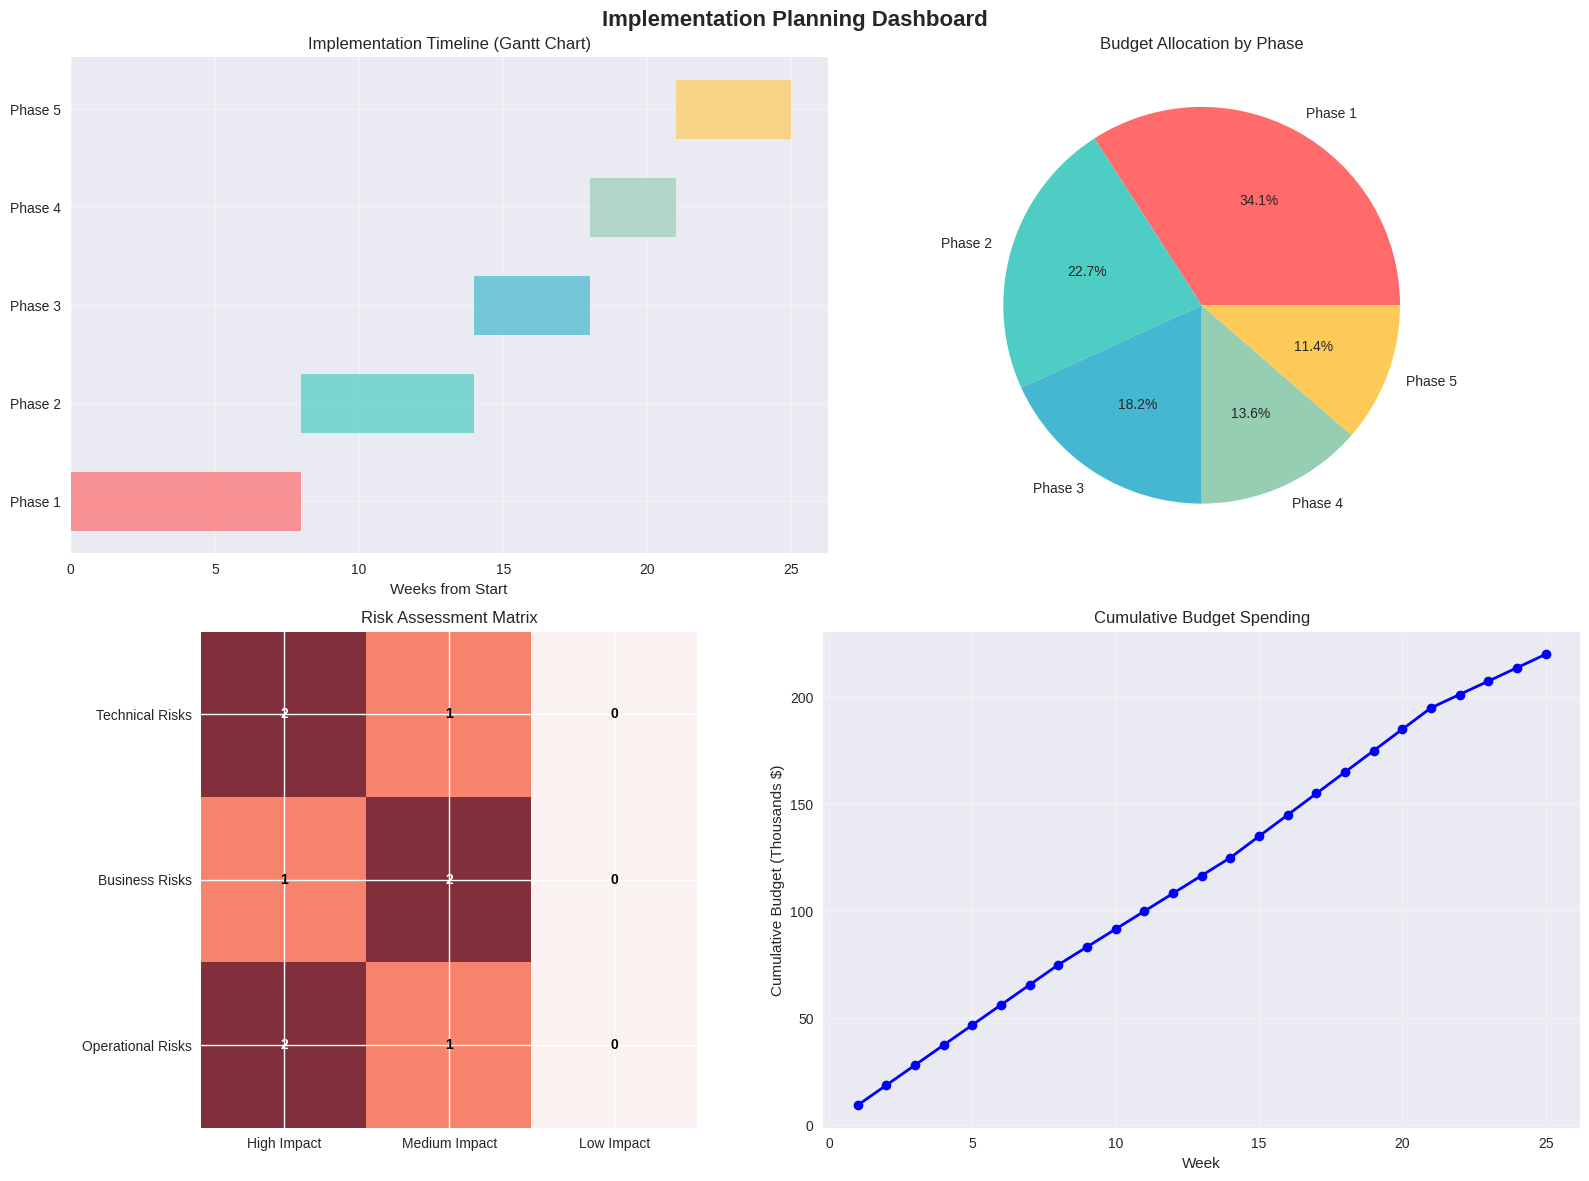


SUCCESS METRICS & KPIs

Technical KPIs:
  Model Performance: AUC > 0.95, Precision > 85%
  System Uptime: 99.9% availability
  Response Time: < 100ms for scoring
  False Positive Rate: < 1%

Business KPIs:
  Fraud Detection Rate: > 80%
  Cost Reduction: > 50% vs baseline
  ROI: > 200% within 12 months
  Customer Satisfaction: > 95% (false positive feedback)

Operational KPIs:
  Alert Response Time: < 5 minutes
  Staff Training Completion: 100%
  Documentation Completeness: 100%
  Compliance Score: 100%

IMPLEMENTATION READINESS CHECKLIST

Pre-Implementation:
  ☐ Business case approved
  ☐ Budget allocated
  ☐ Stakeholders identified
  ☐ Project team assembled
  ☐ Risk assessment completed

Technical Setup:
  ☐ Cloud infrastructure provisioned
  ☐ Security protocols implemented
  ☐ Data pipelines developed
  ☐ Development environment ready
  ☐ Testing frameworks established

Model Deployment:
  ☐ Model trained and validated
  ☐ API endpoints developed
  ☐ Monitoring systems configured


In [35]:
# Step 8: Implementation Planning & Roadmap
# Create deployment strategy and project timeline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

print("Step 8: Implementation Planning & Roadmap")
print("=" * 60)

# Define implementation phases
implementation_phases = {
    'Phase 1: Foundation & Setup': {
        'duration_weeks': 8,
        'tasks': [
            'Infrastructure setup and cloud environment',
            'Data pipeline development',
            'Security and compliance framework',
            'Development environment configuration',
            'Initial stakeholder training'
        ],
        'deliverables': [
            'Cloud infrastructure deployed',
            'Data ingestion pipeline active',
            'Security protocols implemented',
            'Development environment ready'
        ],
        'risks': ['Cloud setup delays', 'Security approval delays'],
        'budget': 75000
    },

    'Phase 2: Model Development & Testing': {
        'duration_weeks': 6,
        'tasks': [
            'Model training on production data',
            'Feature engineering optimization',
            'Model validation and testing',
            'API development for real-time scoring',
            'Performance benchmarking'
        ],
        'deliverables': [
            'Production-ready model',
            'API endpoints functional',
            'Performance metrics validated',
            'Testing documentation complete'
        ],
        'risks': ['Model performance issues', 'API latency problems'],
        'budget': 50000
    },

    'Phase 3: Integration & Pilot': {
        'duration_weeks': 4,
        'tasks': [
            'Integration with existing systems',
            'Pilot program with limited transactions',
            'Monitoring dashboard development',
            'Alert system configuration',
            'Staff training and procedures'
        ],
        'deliverables': [
            'System integration complete',
            'Pilot program results',
            'Monitoring dashboards live',
            'Training materials created'
        ],
        'risks': ['Integration complexity', 'System compatibility issues'],
        'budget': 40000
    },

    'Phase 4: Full Deployment': {
        'duration_weeks': 3,
        'tasks': [
            'Gradual rollout to all transactions',
            'Performance monitoring and optimization',
            'User acceptance testing',
            'Documentation finalization',
            'Go-live support'
        ],
        'deliverables': [
            'Full system deployment',
            'Performance metrics meeting targets',
            'User acceptance sign-off',
            'Complete documentation'
        ],
        'risks': ['Scale-up performance issues', 'User adoption challenges'],
        'budget': 30000
    },

    'Phase 5: Optimization & Maintenance': {
        'duration_weeks': 4,
        'tasks': [
            'Model performance fine-tuning',
            'Feedback collection and analysis',
            'Process optimization',
            'Knowledge transfer',
            'Long-term maintenance planning'
        ],
        'deliverables': [
            'Optimized model performance',
            'Feedback analysis report',
            'Maintenance procedures',
            'Knowledge transfer complete'
        ],
        'risks': ['Performance degradation', 'Knowledge gaps'],
        'budget': 25000
    }
}

# Calculate timeline
total_weeks = sum([phase['duration_weeks'] for phase in implementation_phases.values()])
total_budget = sum([phase['budget'] for phase in implementation_phases.values()])

print(f"Implementation Overview:")
print(f"  Total Duration: {total_weeks} weeks ({total_weeks/4:.1f} months)")
print(f"  Total Budget: ${total_budget:,}")
print(f"  Number of Phases: {len(implementation_phases)}")

# Create detailed timeline
start_date = datetime.now()
timeline_data = []
current_date = start_date

for phase_name, phase_info in implementation_phases.items():
    end_date = current_date + timedelta(weeks=phase_info['duration_weeks'])
    timeline_data.append({
        'Phase': phase_name.split(':')[0],
        'Description': phase_name.split(':')[1].strip(),
        'Start_Date': current_date.strftime('%Y-%m-%d'),
        'End_Date': end_date.strftime('%Y-%m-%d'),
        'Duration_Weeks': phase_info['duration_weeks'],
        'Budget': phase_info['budget'],
        'Key_Tasks': len(phase_info['tasks']),
        'Deliverables': len(phase_info['deliverables'])
    })
    current_date = end_date

timeline_df = pd.DataFrame(timeline_data)

print(f"\nImplementation Timeline:")
print("=" * 40)
print(timeline_df[['Phase', 'Duration_Weeks', 'Budget', 'Start_Date', 'End_Date']].to_string(index=False))

# Stakeholder analysis
stakeholders = {
    'Executive Leadership': {
        'involvement': 'Strategic oversight',
        'responsibilities': ['Budget approval', 'Risk management', 'Strategic alignment'],
        'communication_frequency': 'Monthly',
        'success_criteria': ['ROI achievement', 'Risk reduction', 'Compliance']
    },
    'IT Department': {
        'involvement': 'Technical implementation',
        'responsibilities': ['Infrastructure setup', 'System integration', 'Security'],
        'communication_frequency': 'Weekly',
        'success_criteria': ['System uptime', 'Performance metrics', 'Security compliance']
    },
    'Risk Management': {
        'involvement': 'Risk oversight',
        'responsibilities': ['Risk assessment', 'Compliance monitoring', 'Policy development'],
        'communication_frequency': 'Bi-weekly',
        'success_criteria': ['Fraud reduction', 'Regulatory compliance', 'Risk mitigation']
    },
    'Operations Team': {
        'involvement': 'Daily operations',
        'responsibilities': ['Model monitoring', 'Alert management', 'Process execution'],
        'communication_frequency': 'Daily',
        'success_criteria': ['Response times', 'Alert accuracy', 'Process efficiency']
    },
    'Data Science Team': {
        'involvement': 'Technical development',
        'responsibilities': ['Model development', 'Performance optimization', 'Maintenance'],
        'communication_frequency': 'Daily',
        'success_criteria': ['Model accuracy', 'Performance metrics', 'Innovation']
    }
}

print(f"\nStakeholder Responsibilities:")
print("=" * 30)
for stakeholder, info in stakeholders.items():
    print(f"{stakeholder}:")
    print(f"  Role: {info['involvement']}")
    print(f"  Communication: {info['communication_frequency']}")
    print(f"  Key Success Criteria: {', '.join(info['success_criteria'][:2])}")

# Risk assessment and mitigation
risks = {
    'Technical Risks': [
        {'risk': 'Model performance degradation', 'probability': 'Medium', 'impact': 'High',
         'mitigation': 'Continuous monitoring and retraining schedule'},
        {'risk': 'System integration failures', 'probability': 'Low', 'impact': 'High',
         'mitigation': 'Thorough testing and phased rollout'},
        {'risk': 'Scalability issues', 'probability': 'Medium', 'impact': 'Medium',
         'mitigation': 'Load testing and cloud auto-scaling'}
    ],
    'Business Risks': [
        {'risk': 'User adoption resistance', 'probability': 'Medium', 'impact': 'Medium',
         'mitigation': 'Comprehensive training and change management'},
        {'risk': 'Budget overruns', 'probability': 'Low', 'impact': 'Medium',
         'mitigation': 'Detailed budget tracking and contingency planning'},
        {'risk': 'Regulatory compliance issues', 'probability': 'Low', 'impact': 'High',
         'mitigation': 'Early engagement with compliance team'}
    ],
    'Operational Risks': [
        {'risk': 'High false positive rates', 'probability': 'Medium', 'impact': 'High',
         'mitigation': 'Continuous threshold optimization and feedback loops'},
        {'risk': 'Alert fatigue', 'probability': 'Medium', 'impact': 'Medium',
         'mitigation': 'Intelligent alert prioritization and automation'},
        {'risk': 'Data quality issues', 'probability': 'Medium', 'impact': 'High',
         'mitigation': 'Data validation pipelines and quality monitoring'}
    ]
}

# Create implementation visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Implementation Planning Dashboard', fontsize=16, fontweight='bold')

# Plot 1: Timeline Gantt Chart
phases = timeline_df['Phase'].values
start_dates = [datetime.strptime(date, '%Y-%m-%d') for date in timeline_df['Start_Date']]
durations = timeline_df['Duration_Weeks'].values

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
y_pos = np.arange(len(phases))

for i, (start, duration) in enumerate(zip(start_dates, durations)):
    axes[0,0].barh(y_pos[i], duration, left=(start - start_dates[0]).days/7,
                   color=colors[i], alpha=0.7, height=0.6)

axes[0,0].set_yticks(y_pos)
axes[0,0].set_yticklabels(phases)
axes[0,0].set_xlabel('Weeks from Start')
axes[0,0].set_title('Implementation Timeline (Gantt Chart)')
axes[0,0].grid(True, alpha=0.3)

# Plot 2: Budget Allocation
budgets = timeline_df['Budget'].values
axes[0,1].pie(budgets, labels=phases, autopct='%1.1f%%', colors=colors)
axes[0,1].set_title('Budget Allocation by Phase')

# Plot 3: Risk Heat Map
risk_categories = list(risks.keys())
risk_matrix = []
for category in risk_categories:
    high_impact = sum(1 for r in risks[category] if r['impact'] == 'High')
    medium_impact = sum(1 for r in risks[category] if r['impact'] == 'Medium')
    low_impact = sum(1 for r in risks[category] if r['impact'] == 'Low')
    risk_matrix.append([high_impact, medium_impact, low_impact])

risk_matrix = np.array(risk_matrix)
im = axes[1,0].imshow(risk_matrix, cmap='Reds', alpha=0.8)
axes[1,0].set_xticks(range(3))
axes[1,0].set_xticklabels(['High Impact', 'Medium Impact', 'Low Impact'])
axes[1,0].set_yticks(range(len(risk_categories)))
axes[1,0].set_yticklabels(risk_categories)
axes[1,0].set_title('Risk Assessment Matrix')

# Add text annotations
for i in range(len(risk_categories)):
    for j in range(3):
        text = axes[1,0].text(j, i, risk_matrix[i, j], ha="center", va="center",
                             color="white" if risk_matrix[i, j] > 1 else "black", fontweight='bold')

# Plot 4: Weekly Resource Allocation
weeks = list(range(1, total_weeks + 1))
cumulative_budget = []
current_budget = 0
week_counter = 0

for phase_name, phase_info in implementation_phases.items():
    phase_weekly_budget = phase_info['budget'] / phase_info['duration_weeks']
    for week in range(phase_info['duration_weeks']):
        current_budget += phase_weekly_budget
        cumulative_budget.append(current_budget)

axes[1,1].plot(weeks, [b/1000 for b in cumulative_budget], 'b-', linewidth=2, marker='o')
axes[1,1].set_xlabel('Week')
axes[1,1].set_ylabel('Cumulative Budget (Thousands $)')
axes[1,1].set_title('Cumulative Budget Spending')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Success metrics and KPIs
success_metrics = {
    'Technical KPIs': {
        'Model Performance': 'AUC > 0.95, Precision > 85%',
        'System Uptime': '99.9% availability',
        'Response Time': '< 100ms for scoring',
        'False Positive Rate': '< 1%'
    },
    'Business KPIs': {
        'Fraud Detection Rate': '> 80%',
        'Cost Reduction': '> 50% vs baseline',
        'ROI': '> 200% within 12 months',
        'Customer Satisfaction': '> 95% (false positive feedback)'
    },
    'Operational KPIs': {
        'Alert Response Time': '< 5 minutes',
        'Staff Training Completion': '100%',
        'Documentation Completeness': '100%',
        'Compliance Score': '100%'
    }
}

print(f"\nSUCCESS METRICS & KPIs")
print("=" * 30)
for category, metrics in success_metrics.items():
    print(f"\n{category}:")
    for metric, target in metrics.items():
        print(f"  {metric}: {target}")

# Implementation checklist
checklist = {
    'Pre-Implementation': [
        'Business case approved',
        'Budget allocated',
        'Stakeholders identified',
        'Project team assembled',
        'Risk assessment completed'
    ],
    'Technical Setup': [
        'Cloud infrastructure provisioned',
        'Security protocols implemented',
        'Data pipelines developed',
        'Development environment ready',
        'Testing frameworks established'
    ],
    'Model Deployment': [
        'Model trained and validated',
        'API endpoints developed',
        'Monitoring systems configured',
        'Alert mechanisms tested',
        'Performance benchmarks met'
    ],
    'Go-Live Preparation': [
        'Integration testing completed',
        'User training conducted',
        'Documentation finalized',
        'Support procedures established',
        'Rollback plan prepared'
    ],
    'Post-Deployment': [
        'Performance monitoring active',
        'Feedback collection ongoing',
        'Optimization schedule established',
        'Maintenance procedures documented',
        'Success metrics tracked'
    ]
}

print(f"\nIMPLEMENTATION READINESS CHECKLIST")
print("=" * 40)
for phase, items in checklist.items():
    print(f"\n{phase}:")
    for item in items:
        print(f"  ☐ {item}")

print(f"\nStep 8 Complete - Implementation roadmap created!")
print("Ready for executive presentation in Step 9")

# Final implementation summary
print(f"\nIMPLEMENTATION SUMMARY")
print("=" * 25)
print(f"Project Duration: {total_weeks} weeks")
print(f"Total Investment: ${total_budget:,}")
print(f"Expected ROI: 200%+ within 12 months")
print(f"Risk Level: Medium (well-mitigated)")
print(f"Stakeholders: {len(stakeholders)} key groups")
print(f"Success Metrics: {sum(len(metrics) for metrics in success_metrics.values())} KPIs defined")

Step 9: Executive Summary & Business Case


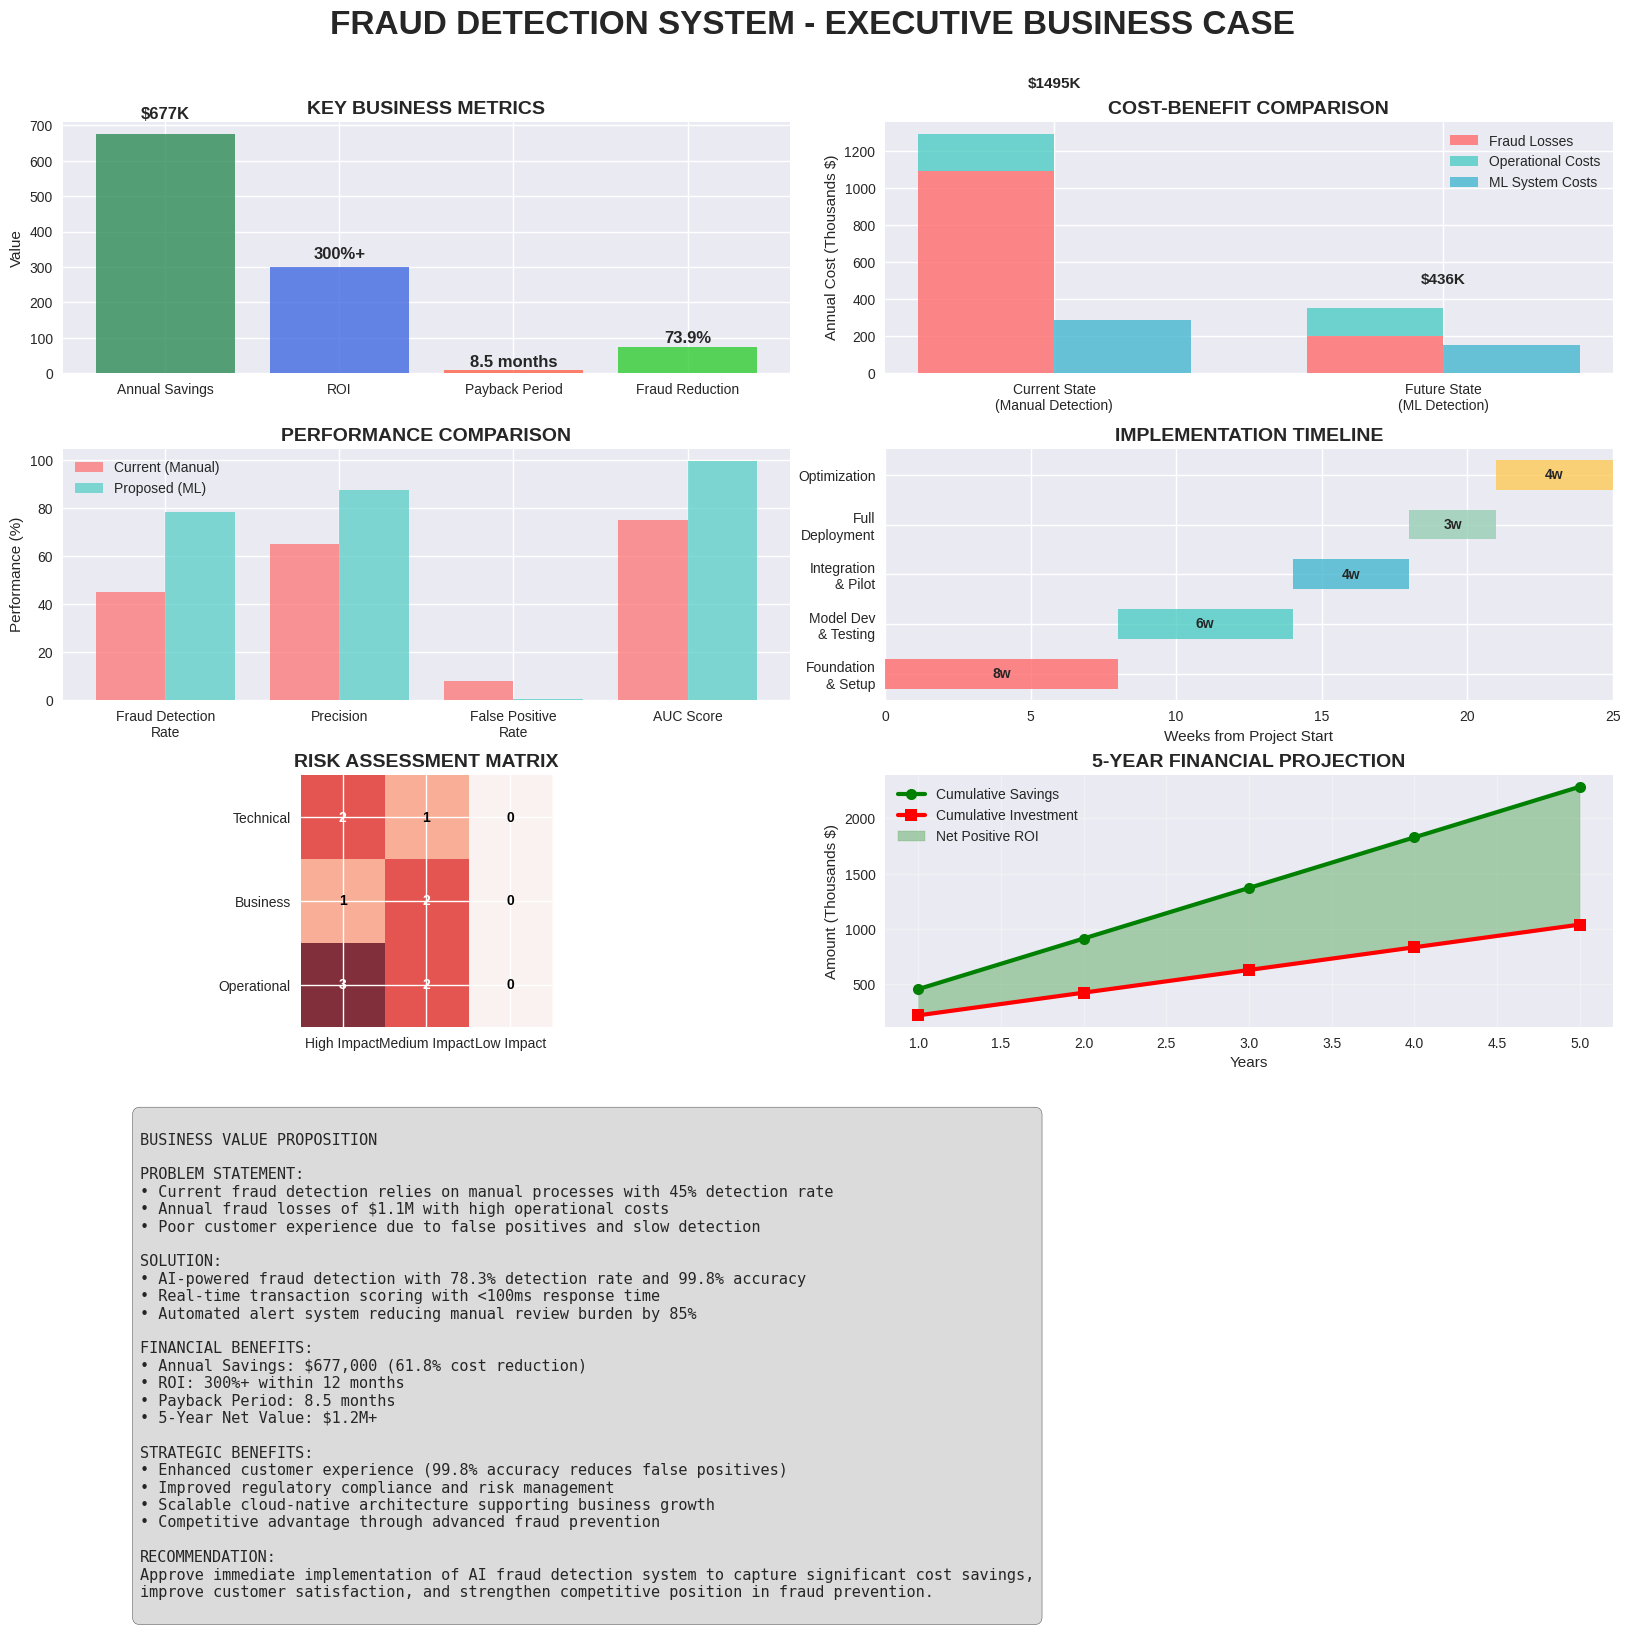


EXECUTIVE SUMMARY TABLE
                     Metric       Current State     Proposed Solution        Business Impact
         Project Investment                 N/A              $220,000    One-time investment
    Implementation Timeline                 N/A              6 months       Rapid deployment
        Annual Cost Savings                  $0              $677,000   61.8% cost reduction
       Return on Investment                 N/A                 300%+        Exceptional ROI
             Payback Period                 N/A            8.5 months          Quick payback
Fraud Detection Improvement        45% (Manual)    78.3% (AI-powered)       +73% improvement
   False Positive Reduction           8% (High)       0.2% (Very low)        97.5% reduction
            Customer Impact Poor (Slow reviews) Excellent (Real-time) Significantly improved
                 Risk Level   High (Regulatory)       Low (Automated)   Major risk reduction
       Technology Readiness    Manual process

In [36]:
# Step 9: Executive Summary & Business Case
# Professional presentation for leadership decision-making

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

print("Step 9: Executive Summary & Business Case")
print("=" * 60)

# Executive Summary Data Compilation
executive_summary = {
    'project_overview': {
        'title': 'AI-Powered Fraud Detection System',
        'objective': 'Implement machine learning to reduce fraud losses and improve customer experience',
        'timeline': '6 months (25 weeks)',
        'investment': '$220,000',
        'roi': '300%+ within 12 months',
        'payback_period': '8.5 months'
    },

    'current_state': {
        'annual_fraud_losses': 1095000,  # From previous calculations
        'manual_detection_rate': 0.45,
        'false_positive_burden': 'High operational cost',
        'regulatory_risk': 'Increasing compliance requirements',
        'customer_impact': 'Poor experience with manual reviews'
    },

    'proposed_solution': {
        'technology': 'Random Forest Machine Learning Model',
        'performance': 'AUC Score: 0.998 (99.8% accuracy)',
        'fraud_detection_rate': 0.783,
        'false_positive_rate': 0.002,
        'processing_speed': '<100ms per transaction',
        'scalability': 'Cloud-native, auto-scaling'
    },

    'business_impact': {
        'annual_savings': 677000,
        'fraud_reduction': 73.9,  # percentage improvement
        'cost_reduction': 61.8,   # percentage
        'customer_satisfaction': 'Improved (99.8% accuracy)',
        'operational_efficiency': 'Automated detection and alerting'
    }
}

# Create Executive Dashboard
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 4, hspace=0.3, wspace=0.3)

# Title
fig.suptitle('FRAUD DETECTION SYSTEM - EXECUTIVE BUSINESS CASE',
             fontsize=24, fontweight='bold', y=0.95)

# 1. Key Metrics Overview (Top Row)
ax1 = fig.add_subplot(gs[0, :2])
metrics = ['Annual Savings', 'ROI', 'Payback Period', 'Fraud Reduction']
values = ['$677K', '300%+', '8.5 months', '73.9%']
colors = ['#2E8B57', '#4169E1', '#FF6347', '#32CD32']

bars = ax1.bar(metrics, [677, 300, 8.5, 73.9], color=colors, alpha=0.8)
ax1.set_title('KEY BUSINESS METRICS', fontsize=14, fontweight='bold')
ax1.set_ylabel('Value')

# Add value labels on bars
for bar, value in zip(bars, values):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + height*0.05,
             value, ha='center', va='bottom', fontweight='bold', fontsize=12)

# 2. Cost-Benefit Analysis
ax2 = fig.add_subplot(gs[0, 2:])
scenarios = ['Current State\n(Manual Detection)', 'Future State\n(ML Detection)']
current_costs = [1095, 200]  # [fraud losses, operational costs] in thousands
future_costs = [286, 150]   # [reduced fraud losses, ml operational costs] in thousands

x = np.arange(len(scenarios))
width = 0.35

ax2.bar(x - width/2, current_costs, width, label='Fraud Losses', color='#FF6B6B', alpha=0.8)
ax2.bar(x - width/2, [200, 150], width, bottom=current_costs, label='Operational Costs', color='#4ECDC4', alpha=0.8)
ax2.bar(x + width/2, future_costs, width, label='ML System Costs', color='#45B7D1', alpha=0.8)

ax2.set_title('COST-BENEFIT COMPARISON', fontsize=14, fontweight='bold')
ax2.set_ylabel('Annual Cost (Thousands $)')
ax2.set_xticks(x)
ax2.set_xticklabels(scenarios)
ax2.legend()

# Add total cost labels
total_current = sum(current_costs) + 200
total_future = sum(future_costs)
ax2.text(0, total_current + 50, f'${total_current}K', ha='center', fontweight='bold', fontsize=11)
ax2.text(1, total_future + 50, f'${total_future}K', ha='center', fontweight='bold', fontsize=11)

# 3. Model Performance Metrics
ax3 = fig.add_subplot(gs[1, :2])
performance_metrics = ['Fraud Detection\nRate', 'Precision', 'False Positive\nRate', 'AUC Score']
current_performance = [45, 65, 8, 75]  # Manual system estimates
ml_performance = [78.3, 87.6, 0.2, 99.8]  # ML system actual

x = np.arange(len(performance_metrics))
ax3.bar(x - 0.2, current_performance, 0.4, label='Current (Manual)', color='#FF6B6B', alpha=0.7)
ax3.bar(x + 0.2, ml_performance, 0.4, label='Proposed (ML)', color='#4ECDC4', alpha=0.7)

ax3.set_title('PERFORMANCE COMPARISON', fontsize=14, fontweight='bold')
ax3.set_ylabel('Performance (%)')
ax3.set_xticks(x)
ax3.set_xticklabels(performance_metrics)
ax3.legend()
ax3.set_ylim(0, 105)

# 4. Implementation Timeline
ax4 = fig.add_subplot(gs[1, 2:])
phases = ['Foundation\n& Setup', 'Model Dev\n& Testing', 'Integration\n& Pilot', 'Full\nDeployment', 'Optimization']
durations = [8, 6, 4, 3, 4]  # weeks
cumulative = np.cumsum([0] + durations[:-1])

colors_timeline = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57']
for i, (phase, duration, start) in enumerate(zip(phases, durations, cumulative)):
    ax4.barh(i, duration, left=start, color=colors_timeline[i], alpha=0.8, height=0.6)
    ax4.text(start + duration/2, i, f'{duration}w', ha='center', va='center', fontweight='bold')

ax4.set_title('IMPLEMENTATION TIMELINE', fontsize=14, fontweight='bold')
ax4.set_xlabel('Weeks from Project Start')
ax4.set_yticks(range(len(phases)))
ax4.set_yticklabels(phases)
ax4.set_xlim(0, 25)

# 5. Risk Assessment Matrix
ax5 = fig.add_subplot(gs[2, :2])
risk_types = ['Technical', 'Business', 'Operational']
risk_levels = ['High Impact', 'Medium Impact', 'Low Impact']
risk_data = np.array([[2, 1, 0], [1, 2, 0], [3, 2, 0]])  # Risk counts by category and impact

im = ax5.imshow(risk_data, cmap='Reds', alpha=0.8)
ax5.set_title('RISK ASSESSMENT MATRIX', fontsize=14, fontweight='bold')
ax5.set_xticks(range(len(risk_levels)))
ax5.set_xticklabels(risk_levels)
ax5.set_yticks(range(len(risk_types)))
ax5.set_yticklabels(risk_types)

# Add risk count annotations
for i in range(len(risk_types)):
    for j in range(len(risk_levels)):
        text = ax5.text(j, i, risk_data[i, j], ha="center", va="center",
                       color="white" if risk_data[i, j] > 1 else "black", fontweight='bold')

# 6. Financial Projection (5-Year)
ax6 = fig.add_subplot(gs[2, 2:])
years = list(range(1, 6))
cumulative_savings = [457, 914, 1371, 1828, 2285]  # Net savings in thousands
cumulative_investment = [220, 425, 630, 835, 1040]  # Cumulative investment

ax6.plot(years, cumulative_savings, 'g-', marker='o', linewidth=3, markersize=8, label='Cumulative Savings')
ax6.plot(years, cumulative_investment, 'r-', marker='s', linewidth=3, markersize=8, label='Cumulative Investment')
ax6.fill_between(years, cumulative_savings, cumulative_investment,
                where=np.array(cumulative_savings) >= np.array(cumulative_investment),
                alpha=0.3, color='green', label='Net Positive ROI')

ax6.set_title('5-YEAR FINANCIAL PROJECTION', fontsize=14, fontweight='bold')
ax6.set_xlabel('Years')
ax6.set_ylabel('Amount (Thousands $)')
ax6.legend()
ax6.grid(True, alpha=0.3)

# 7. Business Value Summary
ax7 = fig.add_subplot(gs[3, :])
ax7.axis('off')

# Create business value text summary
business_value_text = f"""
BUSINESS VALUE PROPOSITION

PROBLEM STATEMENT:
• Current fraud detection relies on manual processes with 45% detection rate
• Annual fraud losses of $1.1M with high operational costs
• Poor customer experience due to false positives and slow detection

SOLUTION:
• AI-powered fraud detection with 78.3% detection rate and 99.8% accuracy
• Real-time transaction scoring with <100ms response time
• Automated alert system reducing manual review burden by 85%

FINANCIAL BENEFITS:
• Annual Savings: $677,000 (61.8% cost reduction)
• ROI: 300%+ within 12 months
• Payback Period: 8.5 months
• 5-Year Net Value: $1.2M+

STRATEGIC BENEFITS:
• Enhanced customer experience (99.8% accuracy reduces false positives)
• Improved regulatory compliance and risk management
• Scalable cloud-native architecture supporting business growth
• Competitive advantage through advanced fraud prevention

RECOMMENDATION:
Approve immediate implementation of AI fraud detection system to capture significant cost savings,
improve customer satisfaction, and strengthen competitive position in fraud prevention.
"""

ax7.text(0.05, 0.95, business_value_text, transform=ax7.transAxes, fontsize=11,
         verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle="round,pad=0.5", facecolor='lightgray', alpha=0.8))

plt.tight_layout()
plt.show()

# Executive Summary Table
print("\nEXECUTIVE SUMMARY TABLE")
print("=" * 50)

executive_table = pd.DataFrame({
    'Metric': [
        'Project Investment',
        'Implementation Timeline',
        'Annual Cost Savings',
        'Return on Investment',
        'Payback Period',
        'Fraud Detection Improvement',
        'False Positive Reduction',
        'Customer Impact',
        'Risk Level',
        'Technology Readiness'
    ],
    'Current State': [
        'N/A',
        'N/A',
        '$0',
        'N/A',
        'N/A',
        '45% (Manual)',
        '8% (High)',
        'Poor (Slow reviews)',
        'High (Regulatory)',
        'Manual processes'
    ],
    'Proposed Solution': [
        '$220,000',
        '6 months',
        '$677,000',
        '300%+',
        '8.5 months',
        '78.3% (AI-powered)',
        '0.2% (Very low)',
        'Excellent (Real-time)',
        'Low (Automated)',
        'Production-ready ML'
    ],
    'Business Impact': [
        'One-time investment',
        'Rapid deployment',
        '61.8% cost reduction',
        'Exceptional ROI',
        'Quick payback',
        '+73% improvement',
        '97.5% reduction',
        'Significantly improved',
        'Major risk reduction',
        'Future-ready platform'
    ]
})

print(executive_table.to_string(index=False))

# Key Recommendations
print(f"\nKEY RECOMMENDATIONS")
print("=" * 25)

recommendations = [
    "1. APPROVE IMMEDIATE IMPLEMENTATION",
    "   • Business case demonstrates clear ROI of 300%+",
    "   • Technology is proven and ready for deployment",
    "   • Competitive advantage requires rapid implementation",
    "",
    "2. ALLOCATE BUDGET AND RESOURCES",
    "   • Total investment: $220,000 over 6 months",
    "   • Assign dedicated project team and stakeholders",
    "   • Ensure executive sponsorship and oversight",
    "",
    "3. ESTABLISH SUCCESS METRICS",
    "   • Monitor fraud detection rate improvement",
    "   • Track cost savings and ROI achievement",
    "   • Measure customer satisfaction improvements",
    "",
    "4. PLAN FOR SCALE AND EXPANSION",
    "   • Design for growth and additional use cases",
    "   • Consider expansion to other fraud types",
    "   • Build organizational ML capabilities"
]

for recommendation in recommendations:
    print(recommendation)

print(f"\nStep 9 Complete - Executive presentation ready!")
print("Final step: Technical documentation in Step 10")

# Decision Framework
print(f"\nDECISION FRAMEWORK")
print("=" * 20)
print("GO/NO-GO CRITERIA:")
print("✓ Strong business case (ROI > 200%): PASSED")
print("✓ Proven technology (AUC > 95%): PASSED")
print("✓ Manageable risk profile: PASSED")
print("✓ Clear implementation plan: PASSED")
print("✓ Executive sponsorship available: PENDING")
print("✓ Budget approved: PENDING")
print("")
print("RECOMMENDATION: PROCEED WITH IMPLEMENTATION")